In [126]:
import tensorflow as tf
import numpy as np
import pickle
import cv2
from numpy import prod
from sklearn.model_selection import train_test_split
import random
from tqdm import tqdm
import math
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

save_model_path = './vehicle_classification'

n_classes = 3
epochs = 100
batch_size = 2048
keep_probability = 0.2
n_samples = 4
top_n_predictions = 3

In [ ]:
def save_image(imgarray,lblarray):
    for i in range(0,lblarray.shape[0]):
        category = lblarray[i]
        if category == 0 :
            saveCifarImage(imgarray[i], "./truck/", "image"+(str)(i))
        elif category == 1:
            saveCifarImage(imgarray[i], "./car/", "image"+(str)(i))
        else:
            saveCifarImage(imgarray[i], "./unknown/", "image"+(str)(i))      
            


In [44]:
lblarray = []
imgarray = []

def extractImagesAndLabels(path, file):
    f = open(path+file, 'rb')
    dict = pickle.load(f,encoding='latin1')
    images = dict['data']
    #display(images.shape)
    images = np.reshape(images, (10000, 3, 32, 32))
    labels = dict['labels']
    if n_classes == 3:
        j = 0
        for i in range(len(labels)):
            if labels[j] == 9:
                labels[j] = 0
                j = j+1
            elif labels[j] == 1:
                labels[j] = 1
                j = j+1
            elif i%10 == 0:
                labels[j] = 2
                j = j+1
            else:
                #print(i,j)
                images = np.delete(images,j,0)
                labels = np.delete(labels,j,0)
        print(j)
        images = np.reshape(images, (j,3,32,32))
    #return images, labels
    imagearray = np.asarray(images)
    display(imagearray.shape)
    labelarray = np.asarray(labels)
    return imagearray, labelarray, j

def extractCategories(path, file):
    f = open(path+file, 'rb')
    dict = pickle.load(f,encoding='latin1')
    return dict['label_names']

def saveCifarImage(array, path, file):
    # array is 3x32x32. cv2 needs 32x32x3
    array = array.transpose(1,2,0)
    # array is RGB. cv2 needs BGR
    array = cv2.cvtColor(array, cv2.COLOR_RGB2BGR)
    # save to PNG file
    return cv2.imwrite(path+file+".png", array)

row = 0
for i in range(5):
    features, labels, r = extractImagesAndLabels("cifar-10-batches-py/", "data_batch_" + str(i+1))
#features = np.array(features, dtype=np.float32).flatten()
    imgarray = np.append(imgarray, features)
#imgarray = imgarray.reshape(10000,3,32,32)
#display(imgarray)
    lblarray = np.append(lblarray,labels)
    row = row + r
    print (imgarray.shape)
    print (lblarray.shape)
    print(labels.shape)
imgarray = imgarray.reshape(row, 3, 32, 32)
lblarray = lblarray.astype(np.uint8)
print (imgarray.shape)
print (lblarray[0:10])
#categories = extractCategories("cifar-10-batches-py/", "batches.meta")
#display (categories)
save_image(imgarray,lblarray )

#    category = (int)(category)
#    cats.append(categories[category])
#print (cats)

2774


(2774, 3, 32, 32)

(8521728,)
(2774,)
(2774,)
2781


(2781, 3, 32, 32)

(17064960,)
(5555,)
(2781,)
2851


(2851, 3, 32, 32)

(25823232,)
(8406,)
(2851,)
2747


(2747, 3, 32, 32)

(34262016,)
(11153,)
(2747,)
2845


(2845, 3, 32, 32)

(43001856,)
(13998,)
(2845,)
(13998, 3, 32, 32)
[2 0 0 1 1 2 0 0 0 2]


In [45]:
#imgarray = imgarray.reshape(5*row, 3, 32, 32)
#lblarray = lblarray.astype(np.uint8)
#print (imgarray.shape)
print (lblarray[0:30])

def feature_scaling(values):
    # Values are rescaled from [0, 255] down to [-0.5, 0.5]
    #for i in range(values.shape[0]):
    #    values[i] = (values[i] - (255 / 2.0)) / 255
    #return values
    a = 0
    b = 1
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (values - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

[2 0 0 1 1 2 0 0 0 2 2 0 1 2 1 1 1 0 0 1 1 1 1 0 2 0 1 0 1 2]


In [46]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : 0 : truck
    : 1 : car
    : 2 : unknown
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    y = np.zeros((len(x), n_classes))
    for i in range(len(x)):
        y[i,x[i]] = 1
  #      if x[i] == 9:
  #          y[i,0] = 1
  #      elif x[i] == 1:
  #          y[i,1] = 1
  #      else:
  #          y[i,2] = 1
    return y


In [47]:
def get_feature_label():
 
    #features = features.reshape(features.shape[0], SIZE, SIZE, CHANNEL)
    # array is 3x32x32. needs 32x32x3
    features = imgarray.transpose(0,2,3,1)
    #features = np.loadtxt(open("data/data.csv", "rb"), dtype=int, delimiter=",", skiprows=1)
    display(lblarray.shape)
    onehot_label_encoded = one_hot_encode(lblarray)
    scaled_features = feature_scaling(features)
    display(onehot_label_encoded.shape)
    return scaled_features, onehot_label_encoded

In [48]:
def get_train_test_data():
    features, labels = get_feature_label()
    display(labels)
    #features = features.reshape(features.shape[0], SIZE, SIZE, CHANNEL)
    train_features, test_features, train_labels, test_labels = train_test_split(
        features,
        labels,
        test_size=0.2,
        random_state=0)
    train_features, valid_features, train_labels, valid_labels = train_test_split(
        train_features,
        train_labels,
        test_size=0.2,
        random_state=0)
    
    return train_features, train_labels, test_features, test_labels, valid_features, valid_labels

train_features, train_labels, test_features, test_labels,valid_features, valid_labels= get_train_test_data()
print(train_labels[0:40])

(13998,)

(13998, 3)

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

[[ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


In [49]:

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
   
    return tf.placeholder(tf.float32, [None] + list(image_shape), "x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(tf.float32, [None, n_classes], "y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(tf.float32, None, "keep_prob")


In [50]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    dimension = x_tensor.get_shape().as_list()
    shape = list(conv_ksize + (dimension[-1],) + (conv_num_outputs,))
    print(shape)
    filter_weights = tf.Variable(tf.truncated_normal(shape,0,0.1)) # (height, width, input_depth, output_depth)
    filter_bias = tf.Variable(tf.zeros(conv_num_outputs))
    padding = 'SAME'
    print(list((1,)+conv_strides+(1,)))
    print(filter_weights)
    conv_layer = tf.nn.conv2d(x_tensor, filter_weights, list((1,)+conv_strides+(1,)), padding)
    conv_layer = tf.nn.bias_add(conv_layer, filter_bias)
    
    conv_layer = tf.nn.relu(conv_layer)
    
    conv_layer = tf.nn.max_pool(
        conv_layer,
        ksize=[1] + list(pool_ksize) + [1],
        strides=[1] + list(pool_strides) + [1],
        padding='SAME')
    
    return conv_layer


In [51]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    dimension = x_tensor.get_shape().as_list()  
    display(dimension)
    x =  tf.reshape(x_tensor,[-1,prod(dimension[1:])])
    display(x.get_shape().as_list())
    return x


In [52]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    dimension = x_tensor.get_shape().as_list()
    shape = list( (dimension[-1],) + (num_outputs,))
    print(dimension, shape)
    weight = tf.Variable(tf.truncated_normal(shape,0,0.1))
    bias = tf.Variable(tf.zeros(num_outputs))
    return tf.nn.relu(tf.add(tf.matmul(x_tensor,weight), bias))


In [53]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    dimension = x_tensor.get_shape().as_list()
    shape = list( (dimension[-1],) + (num_outputs,))
    print(shape)
    weight = tf.Variable(tf.truncated_normal(shape,0,0.01))
    bias = tf.Variable(tf.zeros(num_outputs))
    return tf.add(tf.matmul(x_tensor,weight), bias)

In [54]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    model = conv2d_maxpool(x, conv_num_outputs=18, conv_ksize=(4,4), conv_strides=(1,1), pool_ksize=(8,8), pool_strides=(1,1))
    #model = conv2d_maxpool(x, conv_num_outputs=36, conv_ksize=(4,4), conv_strides=(1,1), pool_ksize=(2,2), pool_strides=(1,1))
    #model = conv2d_maxpool(model, conv_num_outputs=8, conv_ksize=(4,4), conv_strides=(1,1), pool_ksize=(4,4), pool_strides=(1,1))
    #model = tf.nn.relu(model)
    model = tf.nn.dropout(model, keep_prob)    

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    model = flatten(model)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    #model = fully_conn(model,384)
    model = fully_conn(model,200)
    #model = fully_conn(model,20)
    #model = tf.nn.relu(model)
    
    model = tf.nn.dropout(model, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    model = output(model,n_classes)
    
    # TODO: return output
    return model


In [58]:
##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(n_classes)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')


[4, 4, 3, 18]
[1, 1, 1, 1]
<tf.Variable 'Variable:0' shape=(4, 4, 3, 18) dtype=float32_ref>


[None, 32, 32, 18]

[None, 18432]

[None, 18432] [18432, 200]
[200, 3]


In [59]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={x:feature_batch, y:label_batch, keep_prob:keep_probability})


In [60]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    loss = session.run(cost, feed_dict={x:feature_batch, y:label_batch, keep_prob:1.0})
    valid_acc = sess.run(accuracy, feed_dict={
                x: valid_features,
                y: valid_labels,
                keep_prob: 1.})
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                loss,
                valid_acc))


In [70]:
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    batch_count = int(math.ceil(len(train_features)/batch_size))
    # Training cycle
    
    for epoch_i in range(epochs):
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = train_labels[batch_start:batch_start + batch_size]
                # Run optimizer and get loss
                #_, l = sess.run([optimizer, cost],
                #        feed_dict={features: batch_features, labels: batch_labels, keep_prob: keep_probability})
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch_i + 1, batch_i), end='')
            print_stats(sess, train_features, train_labels, cost, accuracy)
    
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Checking the Training on a Single Batch...


Epoch  1/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch  1, CIFAR-10 Batch 0:  Loss:     1.1174 Validation Accuracy: 0.353571


Epoch  1/100:  20%|█████                    | 1/5 [00:31<02:07, 31.88s/batches]

Epoch  1, CIFAR-10 Batch 1:  Loss:     1.0870 Validation Accuracy: 0.353571


Epoch  1/100:  40%|██████████               | 2/5 [01:03<01:34, 31.54s/batches]

Epoch  1, CIFAR-10 Batch 2:  Loss:     1.0870 Validation Accuracy: 0.479464


Epoch  1/100:  60%|███████████████          | 3/5 [01:34<01:02, 31.38s/batches]

Epoch  1, CIFAR-10 Batch 3:  Loss:     1.0874 Validation Accuracy: 0.384375


Epoch  1/100:  80%|████████████████████     | 4/5 [02:05<00:31, 31.39s/batches]

Epoch  1, CIFAR-10 Batch 4:  Loss:     1.0873 Validation Accuracy: 0.373214


Epoch  2/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch  2, CIFAR-10 Batch 0:  Loss:     1.0872 Validation Accuracy: 0.372768


Epoch  2/100:  20%|█████                    | 1/5 [00:30<02:03, 30.96s/batches]

Epoch  2, CIFAR-10 Batch 1:  Loss:     1.0860 Validation Accuracy: 0.371875


Epoch  2/100:  40%|██████████               | 2/5 [01:01<01:32, 30.92s/batches]

Epoch  2, CIFAR-10 Batch 2:  Loss:     1.0835 Validation Accuracy: 0.375000


Epoch  2/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.14s/batches]

Epoch  2, CIFAR-10 Batch 3:  Loss:     1.0793 Validation Accuracy: 0.379018


Epoch  2/100:  80%|████████████████████     | 4/5 [02:05<00:31, 31.29s/batches]

Epoch  2, CIFAR-10 Batch 4:  Loss:     1.0736 Validation Accuracy: 0.462500


Epoch  3/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch  3, CIFAR-10 Batch 0:  Loss:     1.0666 Validation Accuracy: 0.357589


Epoch  3/100:  20%|█████                    | 1/5 [00:31<02:05, 31.49s/batches]

Epoch  3, CIFAR-10 Batch 1:  Loss:     1.0593 Validation Accuracy: 0.354018


Epoch  3/100:  40%|██████████               | 2/5 [01:02<01:34, 31.49s/batches]

Epoch  3, CIFAR-10 Batch 2:  Loss:     1.0520 Validation Accuracy: 0.354911


Epoch  3/100:  60%|███████████████          | 3/5 [01:34<01:03, 31.59s/batches]

Epoch  3, CIFAR-10 Batch 3:  Loss:     1.0459 Validation Accuracy: 0.355804


Epoch  3/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.57s/batches]

Epoch  3, CIFAR-10 Batch 4:  Loss:     1.0410 Validation Accuracy: 0.364732


Epoch  4/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch  4, CIFAR-10 Batch 0:  Loss:     1.0364 Validation Accuracy: 0.379018


Epoch  4/100:  20%|█████                    | 1/5 [00:31<02:06, 31.64s/batches]

Epoch  4, CIFAR-10 Batch 1:  Loss:     1.0323 Validation Accuracy: 0.401339


Epoch  4/100:  40%|██████████               | 2/5 [01:03<01:35, 31.71s/batches]

Epoch  4, CIFAR-10 Batch 2:  Loss:     1.0281 Validation Accuracy: 0.422768


Epoch  4/100:  60%|███████████████          | 3/5 [01:34<01:03, 31.65s/batches]

Epoch  4, CIFAR-10 Batch 3:  Loss:     1.0239 Validation Accuracy: 0.454911


Epoch  4/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.61s/batches]

Epoch  4, CIFAR-10 Batch 4:  Loss:     1.0188 Validation Accuracy: 0.512054


Epoch  5/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch  5, CIFAR-10 Batch 0:  Loss:     1.0112 Validation Accuracy: 0.544643


Epoch  5/100:  20%|█████                    | 1/5 [00:32<02:08, 32.00s/batches]

Epoch  5, CIFAR-10 Batch 1:  Loss:     1.0014 Validation Accuracy: 0.574107


Epoch  5/100:  40%|██████████               | 2/5 [01:04<01:36, 32.08s/batches]

Epoch  5, CIFAR-10 Batch 2:  Loss:     0.9900 Validation Accuracy: 0.596429


Epoch  5/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.14s/batches]

Epoch  5, CIFAR-10 Batch 3:  Loss:     0.9772 Validation Accuracy: 0.622768


Epoch  5/100:  80%|████████████████████     | 4/5 [02:16<00:34, 34.04s/batches]

Epoch  5, CIFAR-10 Batch 4:  Loss:     0.9623 Validation Accuracy: 0.619196


Epoch  6/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch  6, CIFAR-10 Batch 0:  Loss:     0.9465 Validation Accuracy: 0.616964


Epoch  6/100:  20%|█████                    | 1/5 [00:32<02:09, 32.38s/batches]

Epoch  6, CIFAR-10 Batch 1:  Loss:     0.9307 Validation Accuracy: 0.613393


Epoch  6/100:  40%|██████████               | 2/5 [01:04<01:37, 32.49s/batches]

Epoch  6, CIFAR-10 Batch 2:  Loss:     0.9166 Validation Accuracy: 0.607589


Epoch  6/100:  60%|███████████████          | 3/5 [01:39<01:06, 33.07s/batches]

Epoch  6, CIFAR-10 Batch 3:  Loss:     0.9037 Validation Accuracy: 0.599107


Epoch  6/100:  80%|████████████████████     | 4/5 [02:12<00:33, 33.20s/batches]

Epoch  6, CIFAR-10 Batch 4:  Loss:     0.8914 Validation Accuracy: 0.589732


Epoch  7/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch  7, CIFAR-10 Batch 0:  Loss:     0.8828 Validation Accuracy: 0.587500


Epoch  7/100:  20%|█████                    | 1/5 [00:33<02:13, 33.27s/batches]

Epoch  7, CIFAR-10 Batch 1:  Loss:     0.8744 Validation Accuracy: 0.591071


Epoch  7/100:  40%|██████████               | 2/5 [01:05<01:37, 32.55s/batches]

Epoch  7, CIFAR-10 Batch 2:  Loss:     0.8660 Validation Accuracy: 0.608036


Epoch  7/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.29s/batches]

Epoch  7, CIFAR-10 Batch 3:  Loss:     0.8610 Validation Accuracy: 0.615625


Epoch  7/100:  80%|████████████████████     | 4/5 [02:08<00:32, 32.16s/batches]

Epoch  7, CIFAR-10 Batch 4:  Loss:     0.8570 Validation Accuracy: 0.625000


Epoch  8/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch  8, CIFAR-10 Batch 0:  Loss:     0.8560 Validation Accuracy: 0.626786


Epoch  8/100:  20%|█████                    | 1/5 [00:31<02:07, 31.98s/batches]

Epoch  8, CIFAR-10 Batch 1:  Loss:     0.8537 Validation Accuracy: 0.630357


Epoch  8/100:  40%|██████████               | 2/5 [01:03<01:35, 31.98s/batches]

Epoch  8, CIFAR-10 Batch 2:  Loss:     0.8463 Validation Accuracy: 0.626339


Epoch  8/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.90s/batches]

Epoch  8, CIFAR-10 Batch 3:  Loss:     0.8410 Validation Accuracy: 0.630804


Epoch  8/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.88s/batches]

Epoch  8, CIFAR-10 Batch 4:  Loss:     0.8365 Validation Accuracy: 0.633929


Epoch  9/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch  9, CIFAR-10 Batch 0:  Loss:     0.8347 Validation Accuracy: 0.628125


Epoch  9/100:  20%|█████                    | 1/5 [00:31<02:07, 31.83s/batches]

Epoch  9, CIFAR-10 Batch 1:  Loss:     0.8346 Validation Accuracy: 0.635268


Epoch  9/100:  40%|██████████               | 2/5 [01:06<01:39, 33.04s/batches]

Epoch  9, CIFAR-10 Batch 2:  Loss:     0.8305 Validation Accuracy: 0.641964


Epoch  9/100:  60%|███████████████          | 3/5 [01:37<01:05, 32.53s/batches]

Epoch  9, CIFAR-10 Batch 3:  Loss:     0.8257 Validation Accuracy: 0.641071


Epoch  9/100:  80%|████████████████████     | 4/5 [02:09<00:32, 32.50s/batches]

Epoch  9, CIFAR-10 Batch 4:  Loss:     0.8210 Validation Accuracy: 0.642411


Epoch 10/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 10, CIFAR-10 Batch 0:  Loss:     0.8163 Validation Accuracy: 0.641518


Epoch 10/100:  20%|█████                    | 1/5 [00:32<02:11, 32.77s/batches]

Epoch 10, CIFAR-10 Batch 1:  Loss:     0.8108 Validation Accuracy: 0.642411


Epoch 10/100:  40%|██████████               | 2/5 [01:06<01:40, 33.38s/batches]

Epoch 10, CIFAR-10 Batch 2:  Loss:     0.8048 Validation Accuracy: 0.642857


Epoch 10/100:  60%|███████████████          | 3/5 [01:38<01:05, 32.70s/batches]

Epoch 10, CIFAR-10 Batch 3:  Loss:     0.8017 Validation Accuracy: 0.643304


Epoch 10/100:  80%|████████████████████     | 4/5 [02:09<00:32, 32.28s/batches]

Epoch 10, CIFAR-10 Batch 4:  Loss:     0.7998 Validation Accuracy: 0.640179


Epoch 11/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 11, CIFAR-10 Batch 0:  Loss:     0.8005 Validation Accuracy: 0.641518


Epoch 11/100:  20%|█████                    | 1/5 [00:33<02:13, 33.27s/batches]

Epoch 11, CIFAR-10 Batch 1:  Loss:     0.8010 Validation Accuracy: 0.641071


Epoch 11/100:  40%|██████████               | 2/5 [01:04<01:36, 32.30s/batches]

Epoch 11, CIFAR-10 Batch 2:  Loss:     0.7964 Validation Accuracy: 0.642411


Epoch 11/100:  60%|███████████████          | 3/5 [01:38<01:05, 32.92s/batches]

Epoch 11, CIFAR-10 Batch 3:  Loss:     0.7936 Validation Accuracy: 0.645982


Epoch 11/100:  80%|████████████████████     | 4/5 [02:10<00:32, 32.52s/batches]

Epoch 11, CIFAR-10 Batch 4:  Loss:     0.7925 Validation Accuracy: 0.641071


Epoch 12/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 12, CIFAR-10 Batch 0:  Loss:     0.7919 Validation Accuracy: 0.645536


Epoch 12/100:  20%|█████                    | 1/5 [00:30<02:03, 30.86s/batches]

Epoch 12, CIFAR-10 Batch 1:  Loss:     0.7924 Validation Accuracy: 0.646429


Epoch 12/100:  40%|██████████               | 2/5 [01:02<01:34, 31.35s/batches]

Epoch 12, CIFAR-10 Batch 2:  Loss:     0.7898 Validation Accuracy: 0.648661


Epoch 12/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.88s/batches]

Epoch 12, CIFAR-10 Batch 3:  Loss:     0.7870 Validation Accuracy: 0.650446


Epoch 12/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.67s/batches]

Epoch 12, CIFAR-10 Batch 4:  Loss:     0.7830 Validation Accuracy: 0.649554


Epoch 13/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 13, CIFAR-10 Batch 0:  Loss:     0.7799 Validation Accuracy: 0.653571


Epoch 13/100:  20%|█████                    | 1/5 [00:31<02:04, 31.12s/batches]

Epoch 13, CIFAR-10 Batch 1:  Loss:     0.7759 Validation Accuracy: 0.654018


Epoch 13/100:  40%|██████████               | 2/5 [01:02<01:33, 31.12s/batches]

Epoch 13, CIFAR-10 Batch 2:  Loss:     0.7710 Validation Accuracy: 0.655804


Epoch 13/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.07s/batches]

Epoch 13, CIFAR-10 Batch 3:  Loss:     0.7688 Validation Accuracy: 0.651786


Epoch 13/100:  80%|████████████████████     | 4/5 [02:05<00:31, 31.39s/batches]

Epoch 13, CIFAR-10 Batch 4:  Loss:     0.7663 Validation Accuracy: 0.653125


Epoch 14/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 14, CIFAR-10 Batch 0:  Loss:     0.7644 Validation Accuracy: 0.658929


Epoch 14/100:  20%|█████                    | 1/5 [00:31<02:04, 31.11s/batches]

Epoch 14, CIFAR-10 Batch 1:  Loss:     0.7608 Validation Accuracy: 0.661161


Epoch 14/100:  40%|██████████               | 2/5 [01:02<01:33, 31.16s/batches]

Epoch 14, CIFAR-10 Batch 2:  Loss:     0.7570 Validation Accuracy: 0.658036


Epoch 14/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.08s/batches]

Epoch 14, CIFAR-10 Batch 3:  Loss:     0.7562 Validation Accuracy: 0.651339


Epoch 14/100:  80%|████████████████████     | 4/5 [02:03<00:30, 30.99s/batches]

Epoch 14, CIFAR-10 Batch 4:  Loss:     0.7545 Validation Accuracy: 0.662054


Epoch 15/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 15, CIFAR-10 Batch 0:  Loss:     0.7549 Validation Accuracy: 0.668750


Epoch 15/100:  20%|█████                    | 1/5 [00:32<02:09, 32.27s/batches]

Epoch 15, CIFAR-10 Batch 1:  Loss:     0.7555 Validation Accuracy: 0.667411


Epoch 15/100:  40%|██████████               | 2/5 [01:03<01:35, 31.69s/batches]

Epoch 15, CIFAR-10 Batch 2:  Loss:     0.7499 Validation Accuracy: 0.671429


Epoch 15/100:  60%|███████████████          | 3/5 [01:34<01:02, 31.37s/batches]

Epoch 15, CIFAR-10 Batch 3:  Loss:     0.7469 Validation Accuracy: 0.670089


Epoch 15/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.25s/batches]

Epoch 15, CIFAR-10 Batch 4:  Loss:     0.7434 Validation Accuracy: 0.668304


Epoch 16/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 16, CIFAR-10 Batch 0:  Loss:     0.7402 Validation Accuracy: 0.674107


Epoch 16/100:  20%|█████                    | 1/5 [00:30<02:02, 30.69s/batches]

Epoch 16, CIFAR-10 Batch 1:  Loss:     0.7379 Validation Accuracy: 0.669643


Epoch 16/100:  40%|██████████               | 2/5 [01:02<01:33, 31.14s/batches]

Epoch 16, CIFAR-10 Batch 2:  Loss:     0.7333 Validation Accuracy: 0.672321


Epoch 16/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.19s/batches]

Epoch 16, CIFAR-10 Batch 3:  Loss:     0.7304 Validation Accuracy: 0.669196


Epoch 16/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.16s/batches]

Epoch 16, CIFAR-10 Batch 4:  Loss:     0.7255 Validation Accuracy: 0.677679


Epoch 17/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 17, CIFAR-10 Batch 0:  Loss:     0.7241 Validation Accuracy: 0.681696


Epoch 17/100:  20%|█████                    | 1/5 [00:31<02:04, 31.14s/batches]

Epoch 17, CIFAR-10 Batch 1:  Loss:     0.7218 Validation Accuracy: 0.685714


Epoch 17/100:  40%|██████████               | 2/5 [01:01<01:32, 30.99s/batches]

Epoch 17, CIFAR-10 Batch 2:  Loss:     0.7164 Validation Accuracy: 0.682589


Epoch 17/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.04s/batches]

Epoch 17, CIFAR-10 Batch 3:  Loss:     0.7166 Validation Accuracy: 0.673661


Epoch 17/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.04s/batches]

Epoch 17, CIFAR-10 Batch 4:  Loss:     0.7171 Validation Accuracy: 0.675000


Epoch 18/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 18, CIFAR-10 Batch 0:  Loss:     0.7188 Validation Accuracy: 0.688393


Epoch 18/100:  20%|█████                    | 1/5 [00:31<02:06, 31.69s/batches]

Epoch 18, CIFAR-10 Batch 1:  Loss:     0.7194 Validation Accuracy: 0.689732


Epoch 18/100:  40%|██████████               | 2/5 [01:04<01:36, 32.30s/batches]

Epoch 18, CIFAR-10 Batch 2:  Loss:     0.7106 Validation Accuracy: 0.692857


Epoch 18/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.17s/batches]

Epoch 18, CIFAR-10 Batch 3:  Loss:     0.7077 Validation Accuracy: 0.686607


Epoch 18/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.98s/batches]

Epoch 18, CIFAR-10 Batch 4:  Loss:     0.7042 Validation Accuracy: 0.689732


Epoch 19/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 19, CIFAR-10 Batch 0:  Loss:     0.7021 Validation Accuracy: 0.698214


Epoch 19/100:  20%|█████                    | 1/5 [00:35<02:22, 35.50s/batches]

Epoch 19, CIFAR-10 Batch 1:  Loss:     0.6995 Validation Accuracy: 0.698661


Epoch 19/100:  40%|██████████               | 2/5 [01:11<01:47, 35.92s/batches]

Epoch 19, CIFAR-10 Batch 2:  Loss:     0.6927 Validation Accuracy: 0.695982


Epoch 19/100:  60%|███████████████          | 3/5 [01:48<01:12, 36.09s/batches]

Epoch 19, CIFAR-10 Batch 3:  Loss:     0.6909 Validation Accuracy: 0.688393


Epoch 19/100:  80%|████████████████████     | 4/5 [02:25<00:36, 36.28s/batches]

Epoch 19, CIFAR-10 Batch 4:  Loss:     0.6868 Validation Accuracy: 0.693304


Epoch 20/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 20, CIFAR-10 Batch 0:  Loss:     0.6846 Validation Accuracy: 0.701339


Epoch 20/100:  20%|█████                    | 1/5 [00:37<02:28, 37.15s/batches]

Epoch 20, CIFAR-10 Batch 1:  Loss:     0.6815 Validation Accuracy: 0.707143


Epoch 20/100:  40%|██████████               | 2/5 [01:14<01:51, 37.14s/batches]

Epoch 20, CIFAR-10 Batch 2:  Loss:     0.6753 Validation Accuracy: 0.704018


Epoch 20/100:  60%|███████████████          | 3/5 [01:48<01:12, 36.16s/batches]

Epoch 20, CIFAR-10 Batch 3:  Loss:     0.6745 Validation Accuracy: 0.698661


Epoch 20/100:  80%|████████████████████     | 4/5 [02:21<00:35, 35.35s/batches]

Epoch 20, CIFAR-10 Batch 4:  Loss:     0.6758 Validation Accuracy: 0.699107


Epoch 21/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 21, CIFAR-10 Batch 0:  Loss:     0.6771 Validation Accuracy: 0.705804


Epoch 21/100:  20%|█████                    | 1/5 [00:32<02:09, 32.40s/batches]

Epoch 21, CIFAR-10 Batch 1:  Loss:     0.6724 Validation Accuracy: 0.707143


Epoch 21/100:  40%|██████████               | 2/5 [01:04<01:37, 32.46s/batches]

Epoch 21, CIFAR-10 Batch 2:  Loss:     0.6678 Validation Accuracy: 0.700893


Epoch 21/100:  60%|███████████████          | 3/5 [01:38<01:05, 32.85s/batches]

Epoch 21, CIFAR-10 Batch 3:  Loss:     0.6685 Validation Accuracy: 0.700893


Epoch 21/100:  80%|████████████████████     | 4/5 [02:09<00:32, 32.45s/batches]

Epoch 21, CIFAR-10 Batch 4:  Loss:     0.6702 Validation Accuracy: 0.706250


Epoch 22/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 22, CIFAR-10 Batch 0:  Loss:     0.6762 Validation Accuracy: 0.713393


Epoch 22/100:  20%|█████                    | 1/5 [00:31<02:04, 31.05s/batches]

Epoch 22, CIFAR-10 Batch 1:  Loss:     0.6678 Validation Accuracy: 0.715179


Epoch 22/100:  40%|██████████               | 2/5 [01:02<01:33, 31.12s/batches]

Epoch 22, CIFAR-10 Batch 2:  Loss:     0.6584 Validation Accuracy: 0.712946


Epoch 22/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.06s/batches]

Epoch 22, CIFAR-10 Batch 3:  Loss:     0.6580 Validation Accuracy: 0.703571


Epoch 22/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.01s/batches]

Epoch 22, CIFAR-10 Batch 4:  Loss:     0.6584 Validation Accuracy: 0.700893


Epoch 23/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 23, CIFAR-10 Batch 0:  Loss:     0.6654 Validation Accuracy: 0.705357


Epoch 23/100:  20%|█████                    | 1/5 [00:30<02:03, 30.90s/batches]

Epoch 23, CIFAR-10 Batch 1:  Loss:     0.6629 Validation Accuracy: 0.712054


Epoch 23/100:  40%|██████████               | 2/5 [01:02<01:33, 31.04s/batches]

Epoch 23, CIFAR-10 Batch 2:  Loss:     0.6517 Validation Accuracy: 0.715625


Epoch 23/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.04s/batches]

Epoch 23, CIFAR-10 Batch 3:  Loss:     0.6493 Validation Accuracy: 0.714732


Epoch 23/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.05s/batches]

Epoch 23, CIFAR-10 Batch 4:  Loss:     0.6476 Validation Accuracy: 0.718750


Epoch 24/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 24, CIFAR-10 Batch 0:  Loss:     0.6502 Validation Accuracy: 0.723661


Epoch 24/100:  20%|█████                    | 1/5 [00:30<02:03, 30.85s/batches]

Epoch 24, CIFAR-10 Batch 1:  Loss:     0.6574 Validation Accuracy: 0.719643


Epoch 24/100:  40%|██████████               | 2/5 [01:01<01:32, 30.94s/batches]

Epoch 24, CIFAR-10 Batch 2:  Loss:     0.6500 Validation Accuracy: 0.722321


Epoch 24/100:  60%|███████████████          | 3/5 [01:32<01:01, 30.98s/batches]

Epoch 24, CIFAR-10 Batch 3:  Loss:     0.6442 Validation Accuracy: 0.718304


Epoch 24/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.03s/batches]

Epoch 24, CIFAR-10 Batch 4:  Loss:     0.6406 Validation Accuracy: 0.719196


Epoch 25/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 25, CIFAR-10 Batch 0:  Loss:     0.6379 Validation Accuracy: 0.729018


Epoch 25/100:  20%|█████                    | 1/5 [00:31<02:05, 31.45s/batches]

Epoch 25, CIFAR-10 Batch 1:  Loss:     0.6382 Validation Accuracy: 0.725446


Epoch 25/100:  40%|██████████               | 2/5 [01:04<01:36, 32.25s/batches]

Epoch 25, CIFAR-10 Batch 2:  Loss:     0.6352 Validation Accuracy: 0.727232


Epoch 25/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.19s/batches]

Epoch 25, CIFAR-10 Batch 3:  Loss:     0.6331 Validation Accuracy: 0.729018


Epoch 25/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.89s/batches]

Epoch 25, CIFAR-10 Batch 4:  Loss:     0.6335 Validation Accuracy: 0.727679


Epoch 26/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 26, CIFAR-10 Batch 0:  Loss:     0.6339 Validation Accuracy: 0.727232


Epoch 26/100:  20%|█████                    | 1/5 [00:32<02:09, 32.40s/batches]

Epoch 26, CIFAR-10 Batch 1:  Loss:     0.6326 Validation Accuracy: 0.729911


Epoch 26/100:  40%|██████████               | 2/5 [01:03<01:34, 31.66s/batches]

Epoch 26, CIFAR-10 Batch 2:  Loss:     0.6301 Validation Accuracy: 0.731250


Epoch 26/100:  60%|███████████████          | 3/5 [01:34<01:02, 31.44s/batches]

Epoch 26, CIFAR-10 Batch 3:  Loss:     0.6293 Validation Accuracy: 0.734821


Epoch 26/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.82s/batches]

Epoch 26, CIFAR-10 Batch 4:  Loss:     0.6261 Validation Accuracy: 0.730357


Epoch 27/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 27, CIFAR-10 Batch 0:  Loss:     0.6256 Validation Accuracy: 0.728125


Epoch 27/100:  20%|█████                    | 1/5 [00:31<02:04, 31.07s/batches]

Epoch 27, CIFAR-10 Batch 1:  Loss:     0.6227 Validation Accuracy: 0.726786


Epoch 27/100:  40%|██████████               | 2/5 [01:02<01:33, 31.04s/batches]

Epoch 27, CIFAR-10 Batch 2:  Loss:     0.6139 Validation Accuracy: 0.732589


Epoch 27/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.02s/batches]

Epoch 27, CIFAR-10 Batch 3:  Loss:     0.6113 Validation Accuracy: 0.734821


Epoch 27/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.02s/batches]

Epoch 27, CIFAR-10 Batch 4:  Loss:     0.6125 Validation Accuracy: 0.734375


Epoch 28/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 28, CIFAR-10 Batch 0:  Loss:     0.6170 Validation Accuracy: 0.725446


Epoch 28/100:  20%|█████                    | 1/5 [00:31<02:04, 31.07s/batches]

Epoch 28, CIFAR-10 Batch 1:  Loss:     0.6127 Validation Accuracy: 0.729911


Epoch 28/100:  40%|██████████               | 2/5 [01:02<01:33, 31.14s/batches]

Epoch 28, CIFAR-10 Batch 2:  Loss:     0.6063 Validation Accuracy: 0.739286


Epoch 28/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.13s/batches]

Epoch 28, CIFAR-10 Batch 3:  Loss:     0.6082 Validation Accuracy: 0.735714


Epoch 28/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.06s/batches]

Epoch 28, CIFAR-10 Batch 4:  Loss:     0.6104 Validation Accuracy: 0.733036


Epoch 29/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 29, CIFAR-10 Batch 0:  Loss:     0.6209 Validation Accuracy: 0.728125


Epoch 29/100:  20%|█████                    | 1/5 [00:30<02:03, 30.92s/batches]

Epoch 29, CIFAR-10 Batch 1:  Loss:     0.6173 Validation Accuracy: 0.732143


Epoch 29/100:  40%|██████████               | 2/5 [01:01<01:32, 30.97s/batches]

Epoch 29, CIFAR-10 Batch 2:  Loss:     0.6089 Validation Accuracy: 0.740179


Epoch 29/100:  60%|███████████████          | 3/5 [01:32<01:01, 30.95s/batches]

Epoch 29, CIFAR-10 Batch 3:  Loss:     0.6119 Validation Accuracy: 0.733929


Epoch 29/100:  80%|████████████████████     | 4/5 [02:03<00:30, 30.95s/batches]

Epoch 29, CIFAR-10 Batch 4:  Loss:     0.6090 Validation Accuracy: 0.738393


Epoch 30/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 30, CIFAR-10 Batch 0:  Loss:     0.6103 Validation Accuracy: 0.740179


Epoch 30/100:  20%|█████                    | 1/5 [00:31<02:04, 31.17s/batches]

Epoch 30, CIFAR-10 Batch 1:  Loss:     0.6195 Validation Accuracy: 0.731696


Epoch 30/100:  40%|██████████               | 2/5 [01:02<01:33, 31.12s/batches]

Epoch 30, CIFAR-10 Batch 2:  Loss:     0.6130 Validation Accuracy: 0.733929


Epoch 30/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.04s/batches]

Epoch 30, CIFAR-10 Batch 3:  Loss:     0.6041 Validation Accuracy: 0.740625


Epoch 30/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.01s/batches]

Epoch 30, CIFAR-10 Batch 4:  Loss:     0.5992 Validation Accuracy: 0.739732


Epoch 31/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 31, CIFAR-10 Batch 0:  Loss:     0.5951 Validation Accuracy: 0.741518


Epoch 31/100:  20%|█████                    | 1/5 [00:30<02:03, 30.95s/batches]

Epoch 31, CIFAR-10 Batch 1:  Loss:     0.5947 Validation Accuracy: 0.744643


Epoch 31/100:  40%|██████████               | 2/5 [01:01<01:32, 30.79s/batches]

Epoch 31, CIFAR-10 Batch 2:  Loss:     0.5934 Validation Accuracy: 0.745982


Epoch 31/100:  60%|███████████████          | 3/5 [01:32<01:01, 30.76s/batches]

Epoch 31, CIFAR-10 Batch 3:  Loss:     0.5917 Validation Accuracy: 0.743750


Epoch 31/100:  80%|████████████████████     | 4/5 [02:03<00:30, 30.85s/batches]

Epoch 31, CIFAR-10 Batch 4:  Loss:     0.5886 Validation Accuracy: 0.745536


Epoch 32/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 32, CIFAR-10 Batch 0:  Loss:     0.5874 Validation Accuracy: 0.743750


Epoch 32/100:  20%|█████                    | 1/5 [00:30<02:03, 30.93s/batches]

Epoch 32, CIFAR-10 Batch 1:  Loss:     0.5867 Validation Accuracy: 0.744643


Epoch 32/100:  40%|██████████               | 2/5 [01:01<01:32, 30.84s/batches]

Epoch 32, CIFAR-10 Batch 2:  Loss:     0.5865 Validation Accuracy: 0.747321


Epoch 32/100:  60%|███████████████          | 3/5 [01:32<01:01, 30.85s/batches]

Epoch 32, CIFAR-10 Batch 3:  Loss:     0.5891 Validation Accuracy: 0.745089


Epoch 32/100:  80%|████████████████████     | 4/5 [02:03<00:30, 30.81s/batches]

Epoch 32, CIFAR-10 Batch 4:  Loss:     0.5916 Validation Accuracy: 0.744196


Epoch 33/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 33, CIFAR-10 Batch 0:  Loss:     0.5904 Validation Accuracy: 0.745536


Epoch 33/100:  20%|█████                    | 1/5 [00:30<02:03, 30.83s/batches]

Epoch 33, CIFAR-10 Batch 1:  Loss:     0.5848 Validation Accuracy: 0.748214


Epoch 33/100:  40%|██████████               | 2/5 [01:01<01:32, 30.81s/batches]

Epoch 33, CIFAR-10 Batch 2:  Loss:     0.5842 Validation Accuracy: 0.749554


Epoch 33/100:  60%|███████████████          | 3/5 [01:32<01:01, 30.78s/batches]

Epoch 33, CIFAR-10 Batch 3:  Loss:     0.5840 Validation Accuracy: 0.750000


Epoch 33/100:  80%|████████████████████     | 4/5 [02:03<00:30, 30.75s/batches]

Epoch 33, CIFAR-10 Batch 4:  Loss:     0.5836 Validation Accuracy: 0.747768


Epoch 34/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 34, CIFAR-10 Batch 0:  Loss:     0.5894 Validation Accuracy: 0.743750


Epoch 34/100:  20%|█████                    | 1/5 [00:30<02:03, 30.79s/batches]

Epoch 34, CIFAR-10 Batch 1:  Loss:     0.5851 Validation Accuracy: 0.746875


Epoch 34/100:  40%|██████████               | 2/5 [01:01<01:32, 30.86s/batches]

Epoch 34, CIFAR-10 Batch 2:  Loss:     0.5788 Validation Accuracy: 0.747768


Epoch 34/100:  60%|███████████████          | 3/5 [01:32<01:01, 30.89s/batches]

Epoch 34, CIFAR-10 Batch 3:  Loss:     0.5828 Validation Accuracy: 0.748214


Epoch 34/100:  80%|████████████████████     | 4/5 [02:03<00:30, 30.88s/batches]

Epoch 34, CIFAR-10 Batch 4:  Loss:     0.5776 Validation Accuracy: 0.746875


Epoch 35/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 35, CIFAR-10 Batch 0:  Loss:     0.5849 Validation Accuracy: 0.747768


Epoch 35/100:  20%|█████                    | 1/5 [00:31<02:04, 31.05s/batches]

Epoch 35, CIFAR-10 Batch 1:  Loss:     0.5943 Validation Accuracy: 0.737054


Epoch 35/100:  40%|██████████               | 2/5 [01:02<01:33, 31.15s/batches]

Epoch 35, CIFAR-10 Batch 2:  Loss:     0.5830 Validation Accuracy: 0.747321


Epoch 35/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.07s/batches]

Epoch 35, CIFAR-10 Batch 3:  Loss:     0.5826 Validation Accuracy: 0.750000


Epoch 35/100:  80%|████████████████████     | 4/5 [02:09<00:32, 32.28s/batches]

Epoch 35, CIFAR-10 Batch 4:  Loss:     0.5831 Validation Accuracy: 0.748661


Epoch 36/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 36, CIFAR-10 Batch 0:  Loss:     0.5780 Validation Accuracy: 0.752232


Epoch 36/100:  20%|█████                    | 1/5 [00:31<02:04, 31.12s/batches]

Epoch 36, CIFAR-10 Batch 1:  Loss:     0.5780 Validation Accuracy: 0.751786


Epoch 36/100:  40%|██████████               | 2/5 [01:03<01:35, 31.76s/batches]

Epoch 36, CIFAR-10 Batch 2:  Loss:     0.5770 Validation Accuracy: 0.753571


Epoch 36/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.10s/batches]

Epoch 36, CIFAR-10 Batch 3:  Loss:     0.5723 Validation Accuracy: 0.750893


Epoch 36/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.82s/batches]

Epoch 36, CIFAR-10 Batch 4:  Loss:     0.5637 Validation Accuracy: 0.753125


Epoch 37/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 37, CIFAR-10 Batch 0:  Loss:     0.5603 Validation Accuracy: 0.753125


Epoch 37/100:  20%|█████                    | 1/5 [00:30<02:03, 30.84s/batches]

Epoch 37, CIFAR-10 Batch 1:  Loss:     0.5589 Validation Accuracy: 0.754464


Epoch 37/100:  40%|██████████               | 2/5 [01:01<01:32, 30.73s/batches]

Epoch 37, CIFAR-10 Batch 2:  Loss:     0.5577 Validation Accuracy: 0.753571


Epoch 37/100:  60%|███████████████          | 3/5 [01:32<01:01, 30.72s/batches]

Epoch 37, CIFAR-10 Batch 3:  Loss:     0.5585 Validation Accuracy: 0.753125


Epoch 37/100:  80%|████████████████████     | 4/5 [02:03<00:30, 30.79s/batches]

Epoch 37, CIFAR-10 Batch 4:  Loss:     0.5632 Validation Accuracy: 0.751339


Epoch 38/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 38, CIFAR-10 Batch 0:  Loss:     0.5634 Validation Accuracy: 0.753571


Epoch 38/100:  20%|█████                    | 1/5 [00:31<02:04, 31.10s/batches]

Epoch 38, CIFAR-10 Batch 1:  Loss:     0.5576 Validation Accuracy: 0.756250


Epoch 38/100:  40%|██████████               | 2/5 [01:03<01:35, 31.72s/batches]

Epoch 38, CIFAR-10 Batch 2:  Loss:     0.5575 Validation Accuracy: 0.752679


Epoch 38/100:  60%|███████████████          | 3/5 [01:34<01:02, 31.41s/batches]

Epoch 38, CIFAR-10 Batch 3:  Loss:     0.5585 Validation Accuracy: 0.758036


Epoch 38/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.66s/batches]

Epoch 38, CIFAR-10 Batch 4:  Loss:     0.5566 Validation Accuracy: 0.757589


Epoch 39/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 39, CIFAR-10 Batch 0:  Loss:     0.5644 Validation Accuracy: 0.758482


Epoch 39/100:  20%|█████                    | 1/5 [00:32<02:10, 32.51s/batches]

Epoch 39, CIFAR-10 Batch 1:  Loss:     0.5656 Validation Accuracy: 0.753571


Epoch 39/100:  40%|██████████               | 2/5 [01:04<01:36, 32.07s/batches]

Epoch 39, CIFAR-10 Batch 2:  Loss:     0.5565 Validation Accuracy: 0.758036


Epoch 39/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.22s/batches]

Epoch 39, CIFAR-10 Batch 3:  Loss:     0.5568 Validation Accuracy: 0.756696


Epoch 39/100:  80%|████████████████████     | 4/5 [02:09<00:32, 32.28s/batches]

Epoch 39, CIFAR-10 Batch 4:  Loss:     0.5563 Validation Accuracy: 0.757589


Epoch 40/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 40, CIFAR-10 Batch 0:  Loss:     0.5540 Validation Accuracy: 0.757143


Epoch 40/100:  20%|█████                    | 1/5 [00:32<02:08, 32.14s/batches]

Epoch 40, CIFAR-10 Batch 1:  Loss:     0.5593 Validation Accuracy: 0.759821


Epoch 40/100:  40%|██████████               | 2/5 [01:03<01:34, 31.59s/batches]

Epoch 40, CIFAR-10 Batch 2:  Loss:     0.5591 Validation Accuracy: 0.755804


Epoch 40/100:  60%|███████████████          | 3/5 [01:34<01:03, 31.66s/batches]

Epoch 40, CIFAR-10 Batch 3:  Loss:     0.5542 Validation Accuracy: 0.765625


Epoch 40/100:  80%|████████████████████     | 4/5 [02:05<00:31, 31.44s/batches]

Epoch 40, CIFAR-10 Batch 4:  Loss:     0.5513 Validation Accuracy: 0.762054


Epoch 41/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 41, CIFAR-10 Batch 0:  Loss:     0.5503 Validation Accuracy: 0.758929


Epoch 41/100:  20%|█████                    | 1/5 [00:32<02:11, 32.78s/batches]

Epoch 41, CIFAR-10 Batch 1:  Loss:     0.5505 Validation Accuracy: 0.759821


Epoch 41/100:  40%|██████████               | 2/5 [01:04<01:36, 32.05s/batches]

Epoch 41, CIFAR-10 Batch 2:  Loss:     0.5509 Validation Accuracy: 0.762054


Epoch 41/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.20s/batches]

Epoch 41, CIFAR-10 Batch 3:  Loss:     0.5519 Validation Accuracy: 0.758929


Epoch 41/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.85s/batches]

Epoch 41, CIFAR-10 Batch 4:  Loss:     0.5486 Validation Accuracy: 0.766071


Epoch 42/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 42, CIFAR-10 Batch 0:  Loss:     0.5464 Validation Accuracy: 0.763839


Epoch 42/100:  20%|█████                    | 1/5 [00:31<02:06, 31.72s/batches]

Epoch 42, CIFAR-10 Batch 1:  Loss:     0.5428 Validation Accuracy: 0.763393


Epoch 42/100:  40%|██████████               | 2/5 [01:02<01:33, 31.18s/batches]

Epoch 42, CIFAR-10 Batch 2:  Loss:     0.5396 Validation Accuracy: 0.764286


Epoch 42/100:  60%|███████████████          | 3/5 [01:34<01:02, 31.40s/batches]

Epoch 42, CIFAR-10 Batch 3:  Loss:     0.5389 Validation Accuracy: 0.763839


Epoch 42/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.65s/batches]

Epoch 42, CIFAR-10 Batch 4:  Loss:     0.5395 Validation Accuracy: 0.762054


Epoch 43/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 43, CIFAR-10 Batch 0:  Loss:     0.5411 Validation Accuracy: 0.762946


Epoch 43/100:  20%|█████                    | 1/5 [00:33<02:12, 33.19s/batches]

Epoch 43, CIFAR-10 Batch 1:  Loss:     0.5398 Validation Accuracy: 0.765179


Epoch 43/100:  40%|██████████               | 2/5 [01:04<01:36, 32.23s/batches]

Epoch 43, CIFAR-10 Batch 2:  Loss:     0.5353 Validation Accuracy: 0.764732


Epoch 43/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.06s/batches]

Epoch 43, CIFAR-10 Batch 3:  Loss:     0.5375 Validation Accuracy: 0.764286


Epoch 43/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.75s/batches]

Epoch 43, CIFAR-10 Batch 4:  Loss:     0.5379 Validation Accuracy: 0.765625


Epoch 44/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 44, CIFAR-10 Batch 0:  Loss:     0.5445 Validation Accuracy: 0.761161


Epoch 44/100:  20%|█████                    | 1/5 [00:30<02:03, 30.92s/batches]

Epoch 44, CIFAR-10 Batch 1:  Loss:     0.5495 Validation Accuracy: 0.759375


Epoch 44/100:  40%|██████████               | 2/5 [01:03<01:34, 31.56s/batches]

Epoch 44, CIFAR-10 Batch 2:  Loss:     0.5411 Validation Accuracy: 0.767857


Epoch 44/100:  60%|███████████████          | 3/5 [01:34<01:03, 31.63s/batches]

Epoch 44, CIFAR-10 Batch 3:  Loss:     0.5431 Validation Accuracy: 0.767411


Epoch 44/100:  80%|████████████████████     | 4/5 [02:05<00:31, 31.48s/batches]

Epoch 44, CIFAR-10 Batch 4:  Loss:     0.5404 Validation Accuracy: 0.766964


Epoch 45/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 45, CIFAR-10 Batch 0:  Loss:     0.5356 Validation Accuracy: 0.770089


Epoch 45/100:  20%|█████                    | 1/5 [00:33<02:14, 33.71s/batches]

Epoch 45, CIFAR-10 Batch 1:  Loss:     0.5399 Validation Accuracy: 0.766071


Epoch 45/100:  40%|██████████               | 2/5 [01:13<01:50, 36.88s/batches]

Epoch 45, CIFAR-10 Batch 2:  Loss:     0.5402 Validation Accuracy: 0.766071


Epoch 45/100:  60%|███████████████          | 3/5 [01:50<01:13, 36.93s/batches]

Epoch 45, CIFAR-10 Batch 3:  Loss:     0.5340 Validation Accuracy: 0.766518


Epoch 45/100:  80%|████████████████████     | 4/5 [02:24<00:36, 36.13s/batches]

Epoch 45, CIFAR-10 Batch 4:  Loss:     0.5308 Validation Accuracy: 0.770982


Epoch 46/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 46, CIFAR-10 Batch 0:  Loss:     0.5306 Validation Accuracy: 0.770089


Epoch 46/100:  20%|█████                    | 1/5 [00:34<02:19, 34.80s/batches]

Epoch 46, CIFAR-10 Batch 1:  Loss:     0.5299 Validation Accuracy: 0.770089


Epoch 46/100:  40%|██████████               | 2/5 [01:09<01:43, 34.62s/batches]

Epoch 46, CIFAR-10 Batch 2:  Loss:     0.5308 Validation Accuracy: 0.768304


Epoch 46/100:  60%|███████████████          | 3/5 [01:44<01:09, 34.85s/batches]

Epoch 46, CIFAR-10 Batch 3:  Loss:     0.5316 Validation Accuracy: 0.766071


Epoch 46/100:  80%|████████████████████     | 4/5 [02:18<00:34, 34.58s/batches]

Epoch 46, CIFAR-10 Batch 4:  Loss:     0.5322 Validation Accuracy: 0.765179


Epoch 47/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 47, CIFAR-10 Batch 0:  Loss:     0.5312 Validation Accuracy: 0.769643


Epoch 47/100:  20%|█████                    | 1/5 [00:35<02:21, 35.43s/batches]

Epoch 47, CIFAR-10 Batch 1:  Loss:     0.5247 Validation Accuracy: 0.771875


Epoch 47/100:  40%|██████████               | 2/5 [01:10<01:45, 35.22s/batches]

Epoch 47, CIFAR-10 Batch 2:  Loss:     0.5219 Validation Accuracy: 0.776339


Epoch 47/100:  60%|███████████████          | 3/5 [01:44<01:09, 34.85s/batches]

Epoch 47, CIFAR-10 Batch 3:  Loss:     0.5233 Validation Accuracy: 0.774107


Epoch 47/100:  80%|████████████████████     | 4/5 [02:18<00:34, 34.67s/batches]

Epoch 47, CIFAR-10 Batch 4:  Loss:     0.5209 Validation Accuracy: 0.771429


Epoch 48/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 48, CIFAR-10 Batch 0:  Loss:     0.5251 Validation Accuracy: 0.768750


Epoch 48/100:  20%|█████                    | 1/5 [00:32<02:10, 32.68s/batches]

Epoch 48, CIFAR-10 Batch 1:  Loss:     0.5284 Validation Accuracy: 0.767411


Epoch 48/100:  40%|██████████               | 2/5 [01:04<01:37, 32.46s/batches]

Epoch 48, CIFAR-10 Batch 2:  Loss:     0.5242 Validation Accuracy: 0.768750


Epoch 48/100:  60%|███████████████          | 3/5 [01:37<01:04, 32.47s/batches]

Epoch 48, CIFAR-10 Batch 3:  Loss:     0.5241 Validation Accuracy: 0.776339


Epoch 48/100:  80%|████████████████████     | 4/5 [02:10<00:32, 32.57s/batches]

Epoch 48, CIFAR-10 Batch 4:  Loss:     0.5221 Validation Accuracy: 0.777232


Epoch 49/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 49, CIFAR-10 Batch 0:  Loss:     0.5195 Validation Accuracy: 0.772768


Epoch 49/100:  20%|█████                    | 1/5 [00:32<02:10, 32.61s/batches]

Epoch 49, CIFAR-10 Batch 1:  Loss:     0.5206 Validation Accuracy: 0.767857


Epoch 49/100:  40%|██████████               | 2/5 [01:05<01:38, 32.69s/batches]

Epoch 49, CIFAR-10 Batch 2:  Loss:     0.5192 Validation Accuracy: 0.769196


Epoch 49/100:  60%|███████████████          | 3/5 [01:37<01:05, 32.59s/batches]

Epoch 49, CIFAR-10 Batch 3:  Loss:     0.5169 Validation Accuracy: 0.770089


Epoch 49/100:  80%|████████████████████     | 4/5 [02:10<00:32, 32.54s/batches]

Epoch 49, CIFAR-10 Batch 4:  Loss:     0.5124 Validation Accuracy: 0.775893


Epoch 50/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 50, CIFAR-10 Batch 0:  Loss:     0.5114 Validation Accuracy: 0.775446


Epoch 50/100:  20%|█████                    | 1/5 [00:32<02:09, 32.37s/batches]

Epoch 50, CIFAR-10 Batch 1:  Loss:     0.5124 Validation Accuracy: 0.774107


Epoch 50/100:  40%|██████████               | 2/5 [01:05<01:37, 32.54s/batches]

Epoch 50, CIFAR-10 Batch 2:  Loss:     0.5118 Validation Accuracy: 0.773661


Epoch 50/100:  60%|███████████████          | 3/5 [01:37<01:04, 32.47s/batches]

Epoch 50, CIFAR-10 Batch 3:  Loss:     0.5142 Validation Accuracy: 0.774554


Epoch 50/100:  80%|████████████████████     | 4/5 [02:09<00:32, 32.44s/batches]

Epoch 50, CIFAR-10 Batch 4:  Loss:     0.5151 Validation Accuracy: 0.773661


Epoch 51/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 51, CIFAR-10 Batch 0:  Loss:     0.5147 Validation Accuracy: 0.775000


Epoch 51/100:  20%|█████                    | 1/5 [00:32<02:08, 32.15s/batches]

Epoch 51, CIFAR-10 Batch 1:  Loss:     0.5116 Validation Accuracy: 0.775893


Epoch 51/100:  40%|██████████               | 2/5 [01:04<01:36, 32.26s/batches]

Epoch 51, CIFAR-10 Batch 2:  Loss:     0.5088 Validation Accuracy: 0.780804


Epoch 51/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.26s/batches]

Epoch 51, CIFAR-10 Batch 3:  Loss:     0.5074 Validation Accuracy: 0.783036


Epoch 51/100:  80%|████████████████████     | 4/5 [02:09<00:32, 32.35s/batches]

Epoch 51, CIFAR-10 Batch 4:  Loss:     0.5037 Validation Accuracy: 0.779911


Epoch 52/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 52, CIFAR-10 Batch 0:  Loss:     0.5048 Validation Accuracy: 0.773214


Epoch 52/100:  20%|█████                    | 1/5 [00:32<02:10, 32.73s/batches]

Epoch 52, CIFAR-10 Batch 1:  Loss:     0.5041 Validation Accuracy: 0.773214


Epoch 52/100:  40%|██████████               | 2/5 [01:05<01:38, 32.67s/batches]

Epoch 52, CIFAR-10 Batch 2:  Loss:     0.5018 Validation Accuracy: 0.778571


Epoch 52/100:  60%|███████████████          | 3/5 [01:37<01:05, 32.59s/batches]

Epoch 52, CIFAR-10 Batch 3:  Loss:     0.5046 Validation Accuracy: 0.776786


Epoch 52/100:  80%|████████████████████     | 4/5 [02:10<00:32, 32.65s/batches]

Epoch 52, CIFAR-10 Batch 4:  Loss:     0.5048 Validation Accuracy: 0.775446


Epoch 53/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 53, CIFAR-10 Batch 0:  Loss:     0.5096 Validation Accuracy: 0.775893


Epoch 53/100:  20%|█████                    | 1/5 [00:32<02:09, 32.49s/batches]

Epoch 53, CIFAR-10 Batch 1:  Loss:     0.5116 Validation Accuracy: 0.775000


Epoch 53/100:  40%|██████████               | 2/5 [01:05<01:37, 32.58s/batches]

Epoch 53, CIFAR-10 Batch 2:  Loss:     0.5063 Validation Accuracy: 0.784821


Epoch 53/100:  60%|███████████████          | 3/5 [01:38<01:05, 32.73s/batches]

Epoch 53, CIFAR-10 Batch 3:  Loss:     0.5055 Validation Accuracy: 0.789286


Epoch 53/100:  80%|████████████████████     | 4/5 [02:08<00:32, 32.24s/batches]

Epoch 53, CIFAR-10 Batch 4:  Loss:     0.5008 Validation Accuracy: 0.786161


Epoch 54/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 54, CIFAR-10 Batch 0:  Loss:     0.4985 Validation Accuracy: 0.784375


Epoch 54/100:  20%|█████                    | 1/5 [00:32<02:09, 32.45s/batches]

Epoch 54, CIFAR-10 Batch 1:  Loss:     0.5003 Validation Accuracy: 0.778571


Epoch 54/100:  40%|██████████               | 2/5 [01:03<01:34, 31.65s/batches]

Epoch 54, CIFAR-10 Batch 2:  Loss:     0.4986 Validation Accuracy: 0.779464


Epoch 54/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.12s/batches]

Epoch 54, CIFAR-10 Batch 3:  Loss:     0.4950 Validation Accuracy: 0.779911


Epoch 54/100:  80%|████████████████████     | 4/5 [02:08<00:32, 32.20s/batches]

Epoch 54, CIFAR-10 Batch 4:  Loss:     0.4923 Validation Accuracy: 0.782589


Epoch 55/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 55, CIFAR-10 Batch 0:  Loss:     0.4921 Validation Accuracy: 0.786161


Epoch 55/100:  20%|█████                    | 1/5 [00:32<02:10, 32.72s/batches]

Epoch 55, CIFAR-10 Batch 1:  Loss:     0.4944 Validation Accuracy: 0.782589


Epoch 55/100:  40%|██████████               | 2/5 [01:04<01:36, 32.17s/batches]

Epoch 55, CIFAR-10 Batch 2:  Loss:     0.4939 Validation Accuracy: 0.785268


Epoch 55/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.74s/batches]

Epoch 55, CIFAR-10 Batch 3:  Loss:     0.4974 Validation Accuracy: 0.784821


Epoch 55/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.92s/batches]

Epoch 55, CIFAR-10 Batch 4:  Loss:     0.4997 Validation Accuracy: 0.780804


Epoch 56/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 56, CIFAR-10 Batch 0:  Loss:     0.5013 Validation Accuracy: 0.779018


Epoch 56/100:  20%|█████                    | 1/5 [00:30<02:02, 30.65s/batches]

Epoch 56, CIFAR-10 Batch 1:  Loss:     0.4995 Validation Accuracy: 0.781250


Epoch 56/100:  40%|██████████               | 2/5 [01:03<01:34, 31.52s/batches]

Epoch 56, CIFAR-10 Batch 2:  Loss:     0.4945 Validation Accuracy: 0.786161


Epoch 56/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.68s/batches]

Epoch 56, CIFAR-10 Batch 3:  Loss:     0.4936 Validation Accuracy: 0.792411


Epoch 56/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.81s/batches]

Epoch 56, CIFAR-10 Batch 4:  Loss:     0.4892 Validation Accuracy: 0.791964


Epoch 57/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 57, CIFAR-10 Batch 0:  Loss:     0.4904 Validation Accuracy: 0.786161


Epoch 57/100:  20%|█████                    | 1/5 [00:32<02:09, 32.48s/batches]

Epoch 57, CIFAR-10 Batch 1:  Loss:     0.4950 Validation Accuracy: 0.784375


Epoch 57/100:  40%|██████████               | 2/5 [01:04<01:37, 32.47s/batches]

Epoch 57, CIFAR-10 Batch 2:  Loss:     0.4885 Validation Accuracy: 0.783929


Epoch 57/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.24s/batches]

Epoch 57, CIFAR-10 Batch 3:  Loss:     0.4900 Validation Accuracy: 0.781696


Epoch 57/100:  80%|████████████████████     | 4/5 [02:09<00:32, 32.31s/batches]

Epoch 57, CIFAR-10 Batch 4:  Loss:     0.4856 Validation Accuracy: 0.785714


Epoch 58/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 58, CIFAR-10 Batch 0:  Loss:     0.4841 Validation Accuracy: 0.785714


Epoch 58/100:  20%|█████                    | 1/5 [00:31<02:05, 31.35s/batches]

Epoch 58, CIFAR-10 Batch 1:  Loss:     0.4873 Validation Accuracy: 0.784375


Epoch 58/100:  40%|██████████               | 2/5 [01:02<01:34, 31.46s/batches]

Epoch 58, CIFAR-10 Batch 2:  Loss:     0.4815 Validation Accuracy: 0.786161


Epoch 58/100:  60%|███████████████          | 3/5 [01:34<01:03, 31.55s/batches]

Epoch 58, CIFAR-10 Batch 3:  Loss:     0.4811 Validation Accuracy: 0.792411


Epoch 58/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.64s/batches]

Epoch 58, CIFAR-10 Batch 4:  Loss:     0.4803 Validation Accuracy: 0.791964


Epoch 59/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 59, CIFAR-10 Batch 0:  Loss:     0.4822 Validation Accuracy: 0.786161


Epoch 59/100:  20%|█████                    | 1/5 [00:32<02:10, 32.67s/batches]

Epoch 59, CIFAR-10 Batch 1:  Loss:     0.4847 Validation Accuracy: 0.783929


Epoch 59/100:  40%|██████████               | 2/5 [01:03<01:35, 31.85s/batches]

Epoch 59, CIFAR-10 Batch 2:  Loss:     0.4841 Validation Accuracy: 0.789732


Epoch 59/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.97s/batches]

Epoch 59, CIFAR-10 Batch 3:  Loss:     0.4868 Validation Accuracy: 0.787946


Epoch 59/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.76s/batches]

Epoch 59, CIFAR-10 Batch 4:  Loss:     0.4845 Validation Accuracy: 0.789286


Epoch 60/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 60, CIFAR-10 Batch 0:  Loss:     0.4824 Validation Accuracy: 0.790625


Epoch 60/100:  20%|█████                    | 1/5 [00:30<02:02, 30.75s/batches]

Epoch 60, CIFAR-10 Batch 1:  Loss:     0.4802 Validation Accuracy: 0.792857


Epoch 60/100:  40%|██████████               | 2/5 [01:02<01:34, 31.47s/batches]

Epoch 60, CIFAR-10 Batch 2:  Loss:     0.4764 Validation Accuracy: 0.796875


Epoch 60/100:  60%|███████████████          | 3/5 [01:33<01:02, 31.26s/batches]

Epoch 60, CIFAR-10 Batch 3:  Loss:     0.4765 Validation Accuracy: 0.794643


Epoch 60/100:  80%|████████████████████     | 4/5 [02:04<00:31, 31.16s/batches]

Epoch 60, CIFAR-10 Batch 4:  Loss:     0.4743 Validation Accuracy: 0.795536


Epoch 61/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 61, CIFAR-10 Batch 0:  Loss:     0.4761 Validation Accuracy: 0.791071


Epoch 61/100:  20%|█████                    | 1/5 [00:32<02:10, 32.50s/batches]

Epoch 61, CIFAR-10 Batch 1:  Loss:     0.4789 Validation Accuracy: 0.785714


Epoch 61/100:  40%|██████████               | 2/5 [01:03<01:35, 31.88s/batches]

Epoch 61, CIFAR-10 Batch 2:  Loss:     0.4737 Validation Accuracy: 0.790179


Epoch 61/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.02s/batches]

Epoch 61, CIFAR-10 Batch 3:  Loss:     0.4729 Validation Accuracy: 0.791964


Epoch 61/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.73s/batches]

Epoch 61, CIFAR-10 Batch 4:  Loss:     0.4708 Validation Accuracy: 0.791964


Epoch 62/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 62, CIFAR-10 Batch 0:  Loss:     0.4726 Validation Accuracy: 0.791964


Epoch 62/100:  20%|█████                    | 1/5 [00:31<02:06, 31.61s/batches]

Epoch 62, CIFAR-10 Batch 1:  Loss:     0.4764 Validation Accuracy: 0.787946


Epoch 62/100:  40%|██████████               | 2/5 [01:03<01:35, 31.97s/batches]

Epoch 62, CIFAR-10 Batch 2:  Loss:     0.4748 Validation Accuracy: 0.789286


Epoch 62/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.05s/batches]

Epoch 62, CIFAR-10 Batch 3:  Loss:     0.4747 Validation Accuracy: 0.791071


Epoch 62/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.74s/batches]

Epoch 62, CIFAR-10 Batch 4:  Loss:     0.4722 Validation Accuracy: 0.790179


Epoch 63/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 63, CIFAR-10 Batch 0:  Loss:     0.4707 Validation Accuracy: 0.792857


Epoch 63/100:  20%|█████                    | 1/5 [00:30<02:03, 30.79s/batches]

Epoch 63, CIFAR-10 Batch 1:  Loss:     0.4706 Validation Accuracy: 0.791964


Epoch 63/100:  40%|██████████               | 2/5 [01:03<01:34, 31.64s/batches]

Epoch 63, CIFAR-10 Batch 2:  Loss:     0.4665 Validation Accuracy: 0.797768


Epoch 63/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.78s/batches]

Epoch 63, CIFAR-10 Batch 3:  Loss:     0.4671 Validation Accuracy: 0.794643


Epoch 63/100:  80%|████████████████████     | 4/5 [02:05<00:31, 31.49s/batches]

Epoch 63, CIFAR-10 Batch 4:  Loss:     0.4705 Validation Accuracy: 0.792857


Epoch 64/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 64, CIFAR-10 Batch 0:  Loss:     0.4746 Validation Accuracy: 0.789286


Epoch 64/100:  20%|█████                    | 1/5 [00:32<02:09, 32.34s/batches]

Epoch 64, CIFAR-10 Batch 1:  Loss:     0.4749 Validation Accuracy: 0.790625


Epoch 64/100:  40%|██████████               | 2/5 [01:03<01:34, 31.58s/batches]

Epoch 64, CIFAR-10 Batch 2:  Loss:     0.4708 Validation Accuracy: 0.797321


Epoch 64/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.78s/batches]

Epoch 64, CIFAR-10 Batch 3:  Loss:     0.4698 Validation Accuracy: 0.795982


Epoch 64/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.74s/batches]

Epoch 64, CIFAR-10 Batch 4:  Loss:     0.4671 Validation Accuracy: 0.796429


Epoch 65/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 65, CIFAR-10 Batch 0:  Loss:     0.4697 Validation Accuracy: 0.791071


Epoch 65/100:  20%|█████                    | 1/5 [00:32<02:09, 32.38s/batches]

Epoch 65, CIFAR-10 Batch 1:  Loss:     0.4689 Validation Accuracy: 0.792411


Epoch 65/100:  40%|██████████               | 2/5 [01:03<01:35, 31.72s/batches]

Epoch 65, CIFAR-10 Batch 2:  Loss:     0.4657 Validation Accuracy: 0.795536


Epoch 65/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.97s/batches]

Epoch 65, CIFAR-10 Batch 3:  Loss:     0.4665 Validation Accuracy: 0.793304


Epoch 65/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.75s/batches]

Epoch 65, CIFAR-10 Batch 4:  Loss:     0.4595 Validation Accuracy: 0.800893


Epoch 66/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 66, CIFAR-10 Batch 0:  Loss:     0.4636 Validation Accuracy: 0.791518


Epoch 66/100:  20%|█████                    | 1/5 [00:32<02:11, 32.83s/batches]

Epoch 66, CIFAR-10 Batch 1:  Loss:     0.4660 Validation Accuracy: 0.788393


Epoch 66/100:  40%|██████████               | 2/5 [01:05<01:37, 32.53s/batches]

Epoch 66, CIFAR-10 Batch 2:  Loss:     0.4579 Validation Accuracy: 0.797321


Epoch 66/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.99s/batches]

Epoch 66, CIFAR-10 Batch 3:  Loss:     0.4617 Validation Accuracy: 0.792857


Epoch 66/100:  80%|████████████████████     | 4/5 [02:08<00:32, 32.05s/batches]

Epoch 66, CIFAR-10 Batch 4:  Loss:     0.4619 Validation Accuracy: 0.795982


Epoch 67/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 67, CIFAR-10 Batch 0:  Loss:     0.4625 Validation Accuracy: 0.791071


Epoch 67/100:  20%|█████                    | 1/5 [00:30<02:03, 30.85s/batches]

Epoch 67, CIFAR-10 Batch 1:  Loss:     0.4685 Validation Accuracy: 0.786161


Epoch 67/100:  40%|██████████               | 2/5 [01:03<01:35, 31.73s/batches]

Epoch 67, CIFAR-10 Batch 2:  Loss:     0.4650 Validation Accuracy: 0.790625


Epoch 67/100:  60%|███████████████          | 3/5 [01:34<01:02, 31.42s/batches]

Epoch 67, CIFAR-10 Batch 3:  Loss:     0.4611 Validation Accuracy: 0.796875


Epoch 67/100:  80%|████████████████████     | 4/5 [02:06<00:31, 31.71s/batches]

Epoch 67, CIFAR-10 Batch 4:  Loss:     0.4598 Validation Accuracy: 0.795089


Epoch 68/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 68, CIFAR-10 Batch 0:  Loss:     0.4584 Validation Accuracy: 0.793750


Epoch 68/100:  20%|█████                    | 1/5 [00:31<02:06, 31.63s/batches]

Epoch 68, CIFAR-10 Batch 1:  Loss:     0.4580 Validation Accuracy: 0.797768


Epoch 68/100:  40%|██████████               | 2/5 [01:02<01:33, 31.24s/batches]

Epoch 68, CIFAR-10 Batch 2:  Loss:     0.4600 Validation Accuracy: 0.796875


Epoch 68/100:  60%|███████████████          | 3/5 [01:34<01:03, 31.58s/batches]

Epoch 68, CIFAR-10 Batch 3:  Loss:     0.4589 Validation Accuracy: 0.798214


Epoch 68/100:  80%|████████████████████     | 4/5 [02:05<00:31, 31.36s/batches]

Epoch 68, CIFAR-10 Batch 4:  Loss:     0.4564 Validation Accuracy: 0.800000


Epoch 69/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 69, CIFAR-10 Batch 0:  Loss:     0.4567 Validation Accuracy: 0.795089


Epoch 69/100:  20%|█████                    | 1/5 [00:32<02:09, 32.38s/batches]

Epoch 69, CIFAR-10 Batch 1:  Loss:     0.4531 Validation Accuracy: 0.801786


Epoch 69/100:  40%|██████████               | 2/5 [01:04<01:37, 32.49s/batches]

Epoch 69, CIFAR-10 Batch 2:  Loss:     0.4546 Validation Accuracy: 0.795089


Epoch 69/100:  60%|███████████████          | 3/5 [01:37<01:04, 32.45s/batches]

Epoch 69, CIFAR-10 Batch 3:  Loss:     0.4594 Validation Accuracy: 0.793304


Epoch 69/100:  80%|████████████████████     | 4/5 [02:09<00:32, 32.41s/batches]

Epoch 69, CIFAR-10 Batch 4:  Loss:     0.4565 Validation Accuracy: 0.793304


Epoch 70/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 70, CIFAR-10 Batch 0:  Loss:     0.4535 Validation Accuracy: 0.797768


Epoch 70/100:  20%|█████                    | 1/5 [00:30<02:03, 30.76s/batches]

Epoch 70, CIFAR-10 Batch 1:  Loss:     0.4543 Validation Accuracy: 0.795536


Epoch 70/100:  40%|██████████               | 2/5 [01:02<01:34, 31.46s/batches]

Epoch 70, CIFAR-10 Batch 2:  Loss:     0.4460 Validation Accuracy: 0.800893


Epoch 70/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.79s/batches]

Epoch 70, CIFAR-10 Batch 3:  Loss:     0.4467 Validation Accuracy: 0.803571


Epoch 70/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.81s/batches]

Epoch 70, CIFAR-10 Batch 4:  Loss:     0.4467 Validation Accuracy: 0.801786


Epoch 71/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 71, CIFAR-10 Batch 0:  Loss:     0.4510 Validation Accuracy: 0.796875


Epoch 71/100:  20%|█████                    | 1/5 [00:32<02:09, 32.41s/batches]

Epoch 71, CIFAR-10 Batch 1:  Loss:     0.4534 Validation Accuracy: 0.793750


Epoch 71/100:  40%|██████████               | 2/5 [01:04<01:37, 32.34s/batches]

Epoch 71, CIFAR-10 Batch 2:  Loss:     0.4479 Validation Accuracy: 0.801339


Epoch 71/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.27s/batches]

Epoch 71, CIFAR-10 Batch 3:  Loss:     0.4478 Validation Accuracy: 0.800893


Epoch 71/100:  80%|████████████████████     | 4/5 [02:08<00:32, 32.04s/batches]

Epoch 71, CIFAR-10 Batch 4:  Loss:     0.4466 Validation Accuracy: 0.800893


Epoch 72/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 72, CIFAR-10 Batch 0:  Loss:     0.4454 Validation Accuracy: 0.804464


Epoch 72/100:  20%|█████                    | 1/5 [00:32<02:08, 32.13s/batches]

Epoch 72, CIFAR-10 Batch 1:  Loss:     0.4534 Validation Accuracy: 0.796429


Epoch 72/100:  40%|██████████               | 2/5 [01:03<01:35, 31.67s/batches]

Epoch 72, CIFAR-10 Batch 2:  Loss:     0.4555 Validation Accuracy: 0.794643


Epoch 72/100:  60%|███████████████          | 3/5 [01:35<01:03, 31.85s/batches]

Epoch 72, CIFAR-10 Batch 3:  Loss:     0.4506 Validation Accuracy: 0.802232


Epoch 72/100:  80%|████████████████████     | 4/5 [02:07<00:31, 31.92s/batches]

Epoch 72, CIFAR-10 Batch 4:  Loss:     0.4497 Validation Accuracy: 0.802679


Epoch 73/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 73, CIFAR-10 Batch 0:  Loss:     0.4500 Validation Accuracy: 0.800893


Epoch 73/100:  20%|█████                    | 1/5 [00:32<02:08, 32.23s/batches]

Epoch 73, CIFAR-10 Batch 1:  Loss:     0.4478 Validation Accuracy: 0.801786


Epoch 73/100:  40%|██████████               | 2/5 [01:03<01:35, 31.83s/batches]

Epoch 73, CIFAR-10 Batch 2:  Loss:     0.4473 Validation Accuracy: 0.802679


Epoch 73/100:  60%|███████████████          | 3/5 [01:36<01:04, 32.24s/batches]

Epoch 73, CIFAR-10 Batch 3:  Loss:     0.4490 Validation Accuracy: 0.798214


Epoch 73/100:  80%|████████████████████     | 4/5 [02:10<00:32, 32.51s/batches]

Epoch 73, CIFAR-10 Batch 4:  Loss:     0.4436 Validation Accuracy: 0.801339


Epoch 74/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 74, CIFAR-10 Batch 0:  Loss:     0.4383 Validation Accuracy: 0.806696


Epoch 74/100:  20%|█████                    | 1/5 [00:35<02:20, 35.01s/batches]

Epoch 74, CIFAR-10 Batch 1:  Loss:     0.4398 Validation Accuracy: 0.801786


Epoch 74/100:  40%|██████████               | 2/5 [01:12<01:49, 36.42s/batches]

Epoch 74, CIFAR-10 Batch 2:  Loss:     0.4404 Validation Accuracy: 0.804018


Epoch 74/100:  60%|███████████████          | 3/5 [01:51<01:14, 37.11s/batches]

Epoch 74, CIFAR-10 Batch 3:  Loss:     0.4433 Validation Accuracy: 0.807143


Epoch 74/100:  80%|████████████████████     | 4/5 [02:26<00:36, 36.64s/batches]

Epoch 74, CIFAR-10 Batch 4:  Loss:     0.4444 Validation Accuracy: 0.808929


Epoch 75/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 75, CIFAR-10 Batch 0:  Loss:     0.4437 Validation Accuracy: 0.809821


Epoch 75/100:  20%|█████                    | 1/5 [00:35<02:23, 35.82s/batches]

Epoch 75, CIFAR-10 Batch 1:  Loss:     0.4410 Validation Accuracy: 0.807143


Epoch 75/100:  40%|██████████               | 2/5 [01:14<01:51, 37.22s/batches]

Epoch 75, CIFAR-10 Batch 2:  Loss:     0.4384 Validation Accuracy: 0.805804


Epoch 75/100:  60%|███████████████          | 3/5 [01:53<01:15, 37.75s/batches]

Epoch 75, CIFAR-10 Batch 3:  Loss:     0.4378 Validation Accuracy: 0.804464


Epoch 75/100:  80%|████████████████████     | 4/5 [02:27<00:36, 36.83s/batches]

Epoch 75, CIFAR-10 Batch 4:  Loss:     0.4339 Validation Accuracy: 0.810714


Epoch 76/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 76, CIFAR-10 Batch 0:  Loss:     0.4375 Validation Accuracy: 0.803571


Epoch 76/100:  20%|█████                    | 1/5 [00:32<02:11, 32.89s/batches]

Epoch 76, CIFAR-10 Batch 1:  Loss:     0.4409 Validation Accuracy: 0.798214


Epoch 76/100:  40%|██████████               | 2/5 [01:06<01:39, 33.20s/batches]

Epoch 76, CIFAR-10 Batch 2:  Loss:     0.4367 Validation Accuracy: 0.808036


Epoch 76/100:  60%|███████████████          | 3/5 [01:39<01:06, 33.30s/batches]

Epoch 76, CIFAR-10 Batch 3:  Loss:     0.4401 Validation Accuracy: 0.803125


Epoch 76/100:  80%|████████████████████     | 4/5 [02:13<00:33, 33.28s/batches]

Epoch 76, CIFAR-10 Batch 4:  Loss:     0.4387 Validation Accuracy: 0.806696


Epoch 77/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 77, CIFAR-10 Batch 0:  Loss:     0.4373 Validation Accuracy: 0.803125


Epoch 77/100:  20%|█████                    | 1/5 [00:32<02:10, 32.65s/batches]

Epoch 77, CIFAR-10 Batch 1:  Loss:     0.4383 Validation Accuracy: 0.803571


Epoch 77/100:  40%|██████████               | 2/5 [01:05<01:38, 32.75s/batches]

Epoch 77, CIFAR-10 Batch 2:  Loss:     0.4348 Validation Accuracy: 0.805357


Epoch 77/100:  60%|███████████████          | 3/5 [01:38<01:05, 32.72s/batches]

Epoch 77, CIFAR-10 Batch 3:  Loss:     0.4375 Validation Accuracy: 0.804464


Epoch 77/100:  80%|████████████████████     | 4/5 [02:10<00:32, 32.62s/batches]

Epoch 77, CIFAR-10 Batch 4:  Loss:     0.4369 Validation Accuracy: 0.800893


Epoch 78/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 78, CIFAR-10 Batch 0:  Loss:     0.4388 Validation Accuracy: 0.808482


Epoch 78/100:  20%|█████                    | 1/5 [00:33<02:13, 33.36s/batches]

Epoch 78, CIFAR-10 Batch 1:  Loss:     0.4464 Validation Accuracy: 0.802679


Epoch 78/100:  40%|██████████               | 2/5 [01:06<01:39, 33.06s/batches]

Epoch 78, CIFAR-10 Batch 2:  Loss:     0.4427 Validation Accuracy: 0.803571


Epoch 78/100:  60%|███████████████          | 3/5 [01:39<01:06, 33.20s/batches]

Epoch 78, CIFAR-10 Batch 3:  Loss:     0.4400 Validation Accuracy: 0.805804


Epoch 78/100:  80%|████████████████████     | 4/5 [02:11<00:32, 32.98s/batches]

Epoch 78, CIFAR-10 Batch 4:  Loss:     0.4351 Validation Accuracy: 0.805804


Epoch 79/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 79, CIFAR-10 Batch 0:  Loss:     0.4282 Validation Accuracy: 0.810268


Epoch 79/100:  20%|█████                    | 1/5 [00:32<02:09, 32.38s/batches]

Epoch 79, CIFAR-10 Batch 1:  Loss:     0.4260 Validation Accuracy: 0.809375


Epoch 79/100:  40%|██████████               | 2/5 [01:05<01:38, 32.90s/batches]

Epoch 79, CIFAR-10 Batch 2:  Loss:     0.4253 Validation Accuracy: 0.808036


Epoch 79/100:  60%|███████████████          | 3/5 [01:39<01:06, 33.01s/batches]

Epoch 79, CIFAR-10 Batch 3:  Loss:     0.4237 Validation Accuracy: 0.808482


Epoch 79/100:  80%|████████████████████     | 4/5 [02:14<00:33, 33.59s/batches]

Epoch 79, CIFAR-10 Batch 4:  Loss:     0.4229 Validation Accuracy: 0.810714


Epoch 80/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 80, CIFAR-10 Batch 0:  Loss:     0.4248 Validation Accuracy: 0.812054


Epoch 80/100:  20%|█████                    | 1/5 [00:32<02:10, 32.66s/batches]

Epoch 80, CIFAR-10 Batch 1:  Loss:     0.4283 Validation Accuracy: 0.811161


Epoch 80/100:  40%|██████████               | 2/5 [01:07<01:40, 33.59s/batches]

Epoch 80, CIFAR-10 Batch 2:  Loss:     0.4324 Validation Accuracy: 0.811607


Epoch 80/100:  60%|███████████████          | 3/5 [01:40<01:07, 33.56s/batches]

Epoch 80, CIFAR-10 Batch 3:  Loss:     0.4370 Validation Accuracy: 0.809375


Epoch 80/100:  80%|████████████████████     | 4/5 [02:14<00:33, 33.63s/batches]

Epoch 80, CIFAR-10 Batch 4:  Loss:     0.4323 Validation Accuracy: 0.812500


Epoch 81/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 81, CIFAR-10 Batch 0:  Loss:     0.4303 Validation Accuracy: 0.808036


Epoch 81/100:  20%|█████                    | 1/5 [00:33<02:13, 33.37s/batches]

Epoch 81, CIFAR-10 Batch 1:  Loss:     0.4273 Validation Accuracy: 0.810714


Epoch 81/100:  40%|██████████               | 2/5 [01:06<01:40, 33.35s/batches]

Epoch 81, CIFAR-10 Batch 2:  Loss:     0.4248 Validation Accuracy: 0.809821


Epoch 81/100:  60%|███████████████          | 3/5 [01:39<01:06, 33.06s/batches]

Epoch 81, CIFAR-10 Batch 3:  Loss:     0.4259 Validation Accuracy: 0.805804


Epoch 81/100:  80%|████████████████████     | 4/5 [02:12<00:33, 33.23s/batches]

Epoch 81, CIFAR-10 Batch 4:  Loss:     0.4240 Validation Accuracy: 0.807143


Epoch 82/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 82, CIFAR-10 Batch 0:  Loss:     0.4257 Validation Accuracy: 0.803571


Epoch 82/100:  20%|█████                    | 1/5 [00:32<02:10, 32.53s/batches]

Epoch 82, CIFAR-10 Batch 1:  Loss:     0.4297 Validation Accuracy: 0.806696


Epoch 82/100:  40%|██████████               | 2/5 [01:05<01:38, 32.87s/batches]

Epoch 82, CIFAR-10 Batch 2:  Loss:     0.4230 Validation Accuracy: 0.808929


Epoch 82/100:  60%|███████████████          | 3/5 [01:41<01:07, 33.84s/batches]

Epoch 82, CIFAR-10 Batch 3:  Loss:     0.4263 Validation Accuracy: 0.812054


Epoch 82/100:  80%|████████████████████     | 4/5 [02:16<00:34, 34.06s/batches]

Epoch 82, CIFAR-10 Batch 4:  Loss:     0.4297 Validation Accuracy: 0.805357


Epoch 83/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 83, CIFAR-10 Batch 0:  Loss:     0.4305 Validation Accuracy: 0.809375


Epoch 83/100:  20%|█████                    | 1/5 [00:34<02:16, 34.02s/batches]

Epoch 83, CIFAR-10 Batch 1:  Loss:     0.4276 Validation Accuracy: 0.812054


Epoch 83/100:  40%|██████████               | 2/5 [01:07<01:40, 33.60s/batches]

Epoch 83, CIFAR-10 Batch 2:  Loss:     0.4214 Validation Accuracy: 0.814732


Epoch 83/100:  60%|███████████████          | 3/5 [01:41<01:07, 33.74s/batches]

Epoch 83, CIFAR-10 Batch 3:  Loss:     0.4196 Validation Accuracy: 0.812500


Epoch 83/100:  80%|████████████████████     | 4/5 [02:14<00:33, 33.65s/batches]

Epoch 83, CIFAR-10 Batch 4:  Loss:     0.4153 Validation Accuracy: 0.812946


Epoch 84/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 84, CIFAR-10 Batch 0:  Loss:     0.4145 Validation Accuracy: 0.812054


Epoch 84/100:  20%|█████                    | 1/5 [00:34<02:17, 34.44s/batches]

Epoch 84, CIFAR-10 Batch 1:  Loss:     0.4179 Validation Accuracy: 0.808929


Epoch 84/100:  40%|██████████               | 2/5 [01:08<01:43, 34.49s/batches]

Epoch 84, CIFAR-10 Batch 2:  Loss:     0.4155 Validation Accuracy: 0.810714


Epoch 84/100:  60%|███████████████          | 3/5 [01:42<01:08, 34.20s/batches]

Epoch 84, CIFAR-10 Batch 3:  Loss:     0.4130 Validation Accuracy: 0.812500


Epoch 84/100:  80%|████████████████████     | 4/5 [02:15<00:33, 33.87s/batches]

Epoch 84, CIFAR-10 Batch 4:  Loss:     0.4144 Validation Accuracy: 0.812946


Epoch 85/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 85, CIFAR-10 Batch 0:  Loss:     0.4168 Validation Accuracy: 0.814286


Epoch 85/100:  20%|█████                    | 1/5 [00:36<02:25, 36.41s/batches]

Epoch 85, CIFAR-10 Batch 1:  Loss:     0.4212 Validation Accuracy: 0.812500


Epoch 85/100:  40%|██████████               | 2/5 [01:11<01:47, 35.81s/batches]

Epoch 85, CIFAR-10 Batch 2:  Loss:     0.4220 Validation Accuracy: 0.807143


Epoch 85/100:  60%|███████████████          | 3/5 [01:45<01:10, 35.17s/batches]

Epoch 85, CIFAR-10 Batch 3:  Loss:     0.4209 Validation Accuracy: 0.807589


Epoch 85/100:  80%|████████████████████     | 4/5 [02:19<00:34, 34.88s/batches]

Epoch 85, CIFAR-10 Batch 4:  Loss:     0.4183 Validation Accuracy: 0.809821


Epoch 86/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 86, CIFAR-10 Batch 0:  Loss:     0.4190 Validation Accuracy: 0.814286


Epoch 86/100:  20%|█████                    | 1/5 [00:33<02:14, 33.53s/batches]

Epoch 86, CIFAR-10 Batch 1:  Loss:     0.4229 Validation Accuracy: 0.812054


Epoch 86/100:  40%|██████████               | 2/5 [01:07<01:40, 33.56s/batches]

Epoch 86, CIFAR-10 Batch 2:  Loss:     0.4184 Validation Accuracy: 0.809375


Epoch 86/100:  60%|███████████████          | 3/5 [01:41<01:07, 33.77s/batches]

Epoch 86, CIFAR-10 Batch 3:  Loss:     0.4194 Validation Accuracy: 0.810268


Epoch 86/100:  80%|████████████████████     | 4/5 [02:14<00:33, 33.68s/batches]

Epoch 86, CIFAR-10 Batch 4:  Loss:     0.4204 Validation Accuracy: 0.809375


Epoch 87/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 87, CIFAR-10 Batch 0:  Loss:     0.4153 Validation Accuracy: 0.812946


Epoch 87/100:  20%|█████                    | 1/5 [00:34<02:16, 34.10s/batches]

Epoch 87, CIFAR-10 Batch 1:  Loss:     0.4164 Validation Accuracy: 0.815179


Epoch 87/100:  40%|██████████               | 2/5 [01:09<01:44, 34.85s/batches]

Epoch 87, CIFAR-10 Batch 2:  Loss:     0.4146 Validation Accuracy: 0.814732


Epoch 87/100:  60%|███████████████          | 3/5 [01:46<01:10, 35.46s/batches]

Epoch 87, CIFAR-10 Batch 3:  Loss:     0.4150 Validation Accuracy: 0.813393


Epoch 87/100:  80%|████████████████████     | 4/5 [02:22<00:35, 35.67s/batches]

Epoch 87, CIFAR-10 Batch 4:  Loss:     0.4175 Validation Accuracy: 0.810714


Epoch 88/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 88, CIFAR-10 Batch 0:  Loss:     0.4183 Validation Accuracy: 0.805804


Epoch 88/100:  20%|█████                    | 1/5 [00:34<02:18, 34.57s/batches]

Epoch 88, CIFAR-10 Batch 1:  Loss:     0.4125 Validation Accuracy: 0.810714


Epoch 88/100:  40%|██████████               | 2/5 [01:09<01:44, 34.74s/batches]

Epoch 88, CIFAR-10 Batch 2:  Loss:     0.4093 Validation Accuracy: 0.810714


Epoch 88/100:  60%|███████████████          | 3/5 [01:44<01:09, 34.72s/batches]

Epoch 88, CIFAR-10 Batch 3:  Loss:     0.4094 Validation Accuracy: 0.809375


Epoch 88/100:  80%|████████████████████     | 4/5 [02:18<00:34, 34.52s/batches]

Epoch 88, CIFAR-10 Batch 4:  Loss:     0.4137 Validation Accuracy: 0.815179


Epoch 89/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 89, CIFAR-10 Batch 0:  Loss:     0.4193 Validation Accuracy: 0.804911


Epoch 89/100:  20%|█████                    | 1/5 [00:33<02:15, 33.92s/batches]

Epoch 89, CIFAR-10 Batch 1:  Loss:     0.4141 Validation Accuracy: 0.812054


Epoch 89/100:  40%|██████████               | 2/5 [01:07<01:41, 33.90s/batches]

Epoch 89, CIFAR-10 Batch 2:  Loss:     0.4157 Validation Accuracy: 0.805804


Epoch 89/100:  60%|███████████████          | 3/5 [01:42<01:08, 34.14s/batches]

Epoch 89, CIFAR-10 Batch 3:  Loss:     0.4205 Validation Accuracy: 0.804018


Epoch 89/100:  80%|████████████████████     | 4/5 [02:16<00:34, 34.22s/batches]

Epoch 89, CIFAR-10 Batch 4:  Loss:     0.4134 Validation Accuracy: 0.812054


Epoch 90/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 90, CIFAR-10 Batch 0:  Loss:     0.4147 Validation Accuracy: 0.814732


Epoch 90/100:  20%|█████                    | 1/5 [00:34<02:16, 34.23s/batches]

Epoch 90, CIFAR-10 Batch 1:  Loss:     0.4209 Validation Accuracy: 0.807589


Epoch 90/100:  40%|██████████               | 2/5 [01:08<01:42, 34.06s/batches]

Epoch 90, CIFAR-10 Batch 2:  Loss:     0.4116 Validation Accuracy: 0.813839


Epoch 90/100:  60%|███████████████          | 3/5 [01:41<01:07, 33.85s/batches]

Epoch 90, CIFAR-10 Batch 3:  Loss:     0.4110 Validation Accuracy: 0.809375


Epoch 90/100:  80%|████████████████████     | 4/5 [02:16<00:34, 34.20s/batches]

Epoch 90, CIFAR-10 Batch 4:  Loss:     0.4119 Validation Accuracy: 0.806696


Epoch 91/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 91, CIFAR-10 Batch 0:  Loss:     0.4092 Validation Accuracy: 0.810714


Epoch 91/100:  20%|█████                    | 1/5 [00:36<02:26, 36.53s/batches]

Epoch 91, CIFAR-10 Batch 1:  Loss:     0.4090 Validation Accuracy: 0.815625


Epoch 91/100:  40%|██████████               | 2/5 [01:12<01:48, 36.31s/batches]

Epoch 91, CIFAR-10 Batch 2:  Loss:     0.4090 Validation Accuracy: 0.815179


Epoch 91/100:  60%|███████████████          | 3/5 [01:47<01:11, 35.68s/batches]

Epoch 91, CIFAR-10 Batch 3:  Loss:     0.4067 Validation Accuracy: 0.814286


Epoch 91/100:  80%|████████████████████     | 4/5 [02:22<00:35, 35.70s/batches]

Epoch 91, CIFAR-10 Batch 4:  Loss:     0.4021 Validation Accuracy: 0.814732


Epoch 92/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 92, CIFAR-10 Batch 0:  Loss:     0.4001 Validation Accuracy: 0.814732


Epoch 92/100:  20%|█████                    | 1/5 [00:34<02:17, 34.40s/batches]

Epoch 92, CIFAR-10 Batch 1:  Loss:     0.4041 Validation Accuracy: 0.809821


Epoch 92/100:  40%|██████████               | 2/5 [01:09<01:44, 34.75s/batches]

Epoch 92, CIFAR-10 Batch 2:  Loss:     0.4078 Validation Accuracy: 0.809375


Epoch 92/100:  60%|███████████████          | 3/5 [01:43<01:09, 34.66s/batches]

Epoch 92, CIFAR-10 Batch 3:  Loss:     0.4037 Validation Accuracy: 0.811161


Epoch 92/100:  80%|████████████████████     | 4/5 [02:18<00:34, 34.52s/batches]

Epoch 92, CIFAR-10 Batch 4:  Loss:     0.4019 Validation Accuracy: 0.813839


Epoch 93/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 93, CIFAR-10 Batch 0:  Loss:     0.4041 Validation Accuracy: 0.816964


Epoch 93/100:  20%|█████                    | 1/5 [00:34<02:18, 34.65s/batches]

Epoch 93, CIFAR-10 Batch 1:  Loss:     0.4077 Validation Accuracy: 0.812946


Epoch 93/100:  40%|██████████               | 2/5 [01:10<01:46, 35.48s/batches]

Epoch 93, CIFAR-10 Batch 2:  Loss:     0.4144 Validation Accuracy: 0.809375


Epoch 93/100:  60%|███████████████          | 3/5 [01:49<01:12, 36.37s/batches]

Epoch 93, CIFAR-10 Batch 3:  Loss:     0.4167 Validation Accuracy: 0.808929


Epoch 93/100:  80%|████████████████████     | 4/5 [02:24<00:36, 36.14s/batches]

Epoch 93, CIFAR-10 Batch 4:  Loss:     0.4075 Validation Accuracy: 0.810268


Epoch 94/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 94, CIFAR-10 Batch 0:  Loss:     0.4011 Validation Accuracy: 0.815179


Epoch 94/100:  20%|█████                    | 1/5 [00:35<02:22, 35.59s/batches]

Epoch 94, CIFAR-10 Batch 1:  Loss:     0.4017 Validation Accuracy: 0.820536


Epoch 94/100:  40%|██████████               | 2/5 [01:10<01:45, 35.14s/batches]

Epoch 94, CIFAR-10 Batch 2:  Loss:     0.3992 Validation Accuracy: 0.815179


Epoch 94/100:  60%|███████████████          | 3/5 [01:45<01:10, 35.17s/batches]

Epoch 94, CIFAR-10 Batch 3:  Loss:     0.3992 Validation Accuracy: 0.814732


Epoch 94/100:  80%|████████████████████     | 4/5 [02:20<00:35, 35.14s/batches]

Epoch 94, CIFAR-10 Batch 4:  Loss:     0.3963 Validation Accuracy: 0.814732


Epoch 95/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 95, CIFAR-10 Batch 0:  Loss:     0.3934 Validation Accuracy: 0.817411


Epoch 95/100:  20%|█████                    | 1/5 [00:33<02:15, 33.93s/batches]

Epoch 95, CIFAR-10 Batch 1:  Loss:     0.3964 Validation Accuracy: 0.817857


Epoch 95/100:  40%|██████████               | 2/5 [01:07<01:40, 33.52s/batches]

Epoch 95, CIFAR-10 Batch 2:  Loss:     0.3967 Validation Accuracy: 0.819196


Epoch 95/100:  60%|███████████████          | 3/5 [01:41<01:07, 33.79s/batches]

Epoch 95, CIFAR-10 Batch 3:  Loss:     0.4028 Validation Accuracy: 0.814286


Epoch 95/100:  80%|████████████████████     | 4/5 [02:15<00:33, 33.81s/batches]

Epoch 95, CIFAR-10 Batch 4:  Loss:     0.4089 Validation Accuracy: 0.809375


Epoch 96/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 96, CIFAR-10 Batch 0:  Loss:     0.4085 Validation Accuracy: 0.812054


Epoch 96/100:  20%|█████                    | 1/5 [00:33<02:13, 33.35s/batches]

Epoch 96, CIFAR-10 Batch 1:  Loss:     0.4045 Validation Accuracy: 0.817857


Epoch 96/100:  40%|██████████               | 2/5 [01:06<01:39, 33.16s/batches]

Epoch 96, CIFAR-10 Batch 2:  Loss:     0.3999 Validation Accuracy: 0.816964


Epoch 96/100:  60%|███████████████          | 3/5 [01:38<01:05, 32.98s/batches]

Epoch 96, CIFAR-10 Batch 3:  Loss:     0.3992 Validation Accuracy: 0.814286


Epoch 96/100:  80%|████████████████████     | 4/5 [02:11<00:32, 32.91s/batches]

Epoch 96, CIFAR-10 Batch 4:  Loss:     0.3951 Validation Accuracy: 0.818304


Epoch 97/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 97, CIFAR-10 Batch 0:  Loss:     0.3941 Validation Accuracy: 0.818750


Epoch 97/100:  20%|█████                    | 1/5 [00:33<02:12, 33.16s/batches]

Epoch 97, CIFAR-10 Batch 1:  Loss:     0.3976 Validation Accuracy: 0.815625


Epoch 97/100:  40%|██████████               | 2/5 [01:07<01:41, 33.78s/batches]

Epoch 97, CIFAR-10 Batch 2:  Loss:     0.3955 Validation Accuracy: 0.813839


Epoch 97/100:  60%|███████████████          | 3/5 [01:40<01:07, 33.57s/batches]

Epoch 97, CIFAR-10 Batch 3:  Loss:     0.3944 Validation Accuracy: 0.817857


Epoch 97/100:  80%|████████████████████     | 4/5 [02:13<00:33, 33.31s/batches]

Epoch 97, CIFAR-10 Batch 4:  Loss:     0.3932 Validation Accuracy: 0.817411


Epoch 98/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 98, CIFAR-10 Batch 0:  Loss:     0.3981 Validation Accuracy: 0.820089


Epoch 98/100:  20%|█████                    | 1/5 [00:34<02:19, 35.00s/batches]

Epoch 98, CIFAR-10 Batch 1:  Loss:     0.4050 Validation Accuracy: 0.811607


Epoch 98/100:  40%|██████████               | 2/5 [01:12<01:48, 36.11s/batches]

Epoch 98, CIFAR-10 Batch 2:  Loss:     0.3996 Validation Accuracy: 0.817411


Epoch 98/100:  60%|███████████████          | 3/5 [01:45<01:10, 35.26s/batches]

Epoch 98, CIFAR-10 Batch 3:  Loss:     0.4007 Validation Accuracy: 0.813393


Epoch 98/100:  80%|████████████████████     | 4/5 [02:18<00:34, 34.67s/batches]

Epoch 98, CIFAR-10 Batch 4:  Loss:     0.4031 Validation Accuracy: 0.812054


Epoch 99/100:   0%|                                 | 0/5 [00:00<?, ?batches/s]

Epoch 99, CIFAR-10 Batch 0:  Loss:     0.3977 Validation Accuracy: 0.818304


Epoch 99/100:  20%|█████                    | 1/5 [00:33<02:13, 33.35s/batches]

Epoch 99, CIFAR-10 Batch 1:  Loss:     0.4053 Validation Accuracy: 0.812946


Epoch 99/100:  40%|██████████               | 2/5 [01:10<01:46, 35.48s/batches]

Epoch 99, CIFAR-10 Batch 2:  Loss:     0.4088 Validation Accuracy: 0.805357


Epoch 99/100:  60%|███████████████          | 3/5 [01:50<01:13, 36.94s/batches]

Epoch 99, CIFAR-10 Batch 3:  Loss:     0.3985 Validation Accuracy: 0.813839


Epoch 99/100:  80%|████████████████████     | 4/5 [02:28<00:37, 37.19s/batches]

Epoch 99, CIFAR-10 Batch 4:  Loss:     0.3914 Validation Accuracy: 0.813393


Epoch 100/100:   0%|                                | 0/5 [00:00<?, ?batches/s]

Epoch 100, CIFAR-10 Batch 0:  Loss:     0.3905 Validation Accuracy: 0.815625


Epoch 100/100:  20%|████▊                   | 1/5 [00:38<02:34, 38.70s/batches]

Epoch 100, CIFAR-10 Batch 1:  Loss:     0.3889 Validation Accuracy: 0.815625


Epoch 100/100:  40%|█████████▌              | 2/5 [01:19<01:59, 39.70s/batches]

Epoch 100, CIFAR-10 Batch 2:  Loss:     0.3958 Validation Accuracy: 0.812946


Epoch 100/100:  60%|██████████████▍         | 3/5 [02:02<01:21, 40.80s/batches]

Epoch 100, CIFAR-10 Batch 3:  Loss:     0.3992 Validation Accuracy: 0.810268


Epoch 100/100:  80%|███████████████████▏    | 4/5 [02:44<00:41, 41.15s/batches]

Epoch 100, CIFAR-10 Batch 4:  Loss:     0.3926 Validation Accuracy: 0.815625


Epoch 100/100: 100%|████████████████████████| 5/5 [03:16<00:00, 39.34s/batches]


In [71]:

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

def test_model():
    """
    Test the saved model against the test dataset
    """

#    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        batch_count = int(math.ceil(len(test_features)/batch_size))
    
        test_batch_acc_total = 0
        test_batch_count = 0
            
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        for batch_i in batches_pbar:
        # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = test_features[batch_start:batch_start + batch_size]
            batch_labels = test_labels[batch_start:batch_start + batch_size]
                   
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: batch_features, loaded_y: batch_labels, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print(test_batch_acc_total,test_batch_count )
        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))



test_model()

INFO:tensorflow:Restoring parameters from ./vehicle_classification


Epoch 100/100: 100%|████████████████████████| 2/2 [00:05<00:00,  2.63s/batches]


1.68217045069 2
Testing Accuracy: 0.8410852253437042



In [127]:
def _load_label_names():
    """
    Load the label names from file
    """
    return ['truck', 'car', 'unknown']
    #return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [128]:
def display_image_predictions(features, labels, predictions):
    n_classes = 3
    label_names = _load_label_names()
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]

        axies[image_i][0].imshow(feature)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])
        display(pred_names,correct_name)


In [129]:
 # Print Random Samples
def random_test():
    random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
   
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)
        display(random_test_predictions)


array([1, 1, 2, 1, 0, 2, 1, 0, 0, 1])

INFO:tensorflow:Restoring parameters from ./vehicle_classification


['car', 'truck', 'unknown']

'car'

['truck', 'car', 'unknown']

'truck'

['truck', 'car', 'unknown']

'truck'

['truck', 'car', 'unknown']

'truck'

TopKV2(values=array([[ 0.97139955,  0.02686849,  0.00173206],
       [ 0.84746343,  0.14421034,  0.00832631],
       [ 0.99030137,  0.00810456,  0.00159411],
       [ 0.6036579 ,  0.2072423 ,  0.18909976]], dtype=float32), indices=array([[1, 0, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]]))

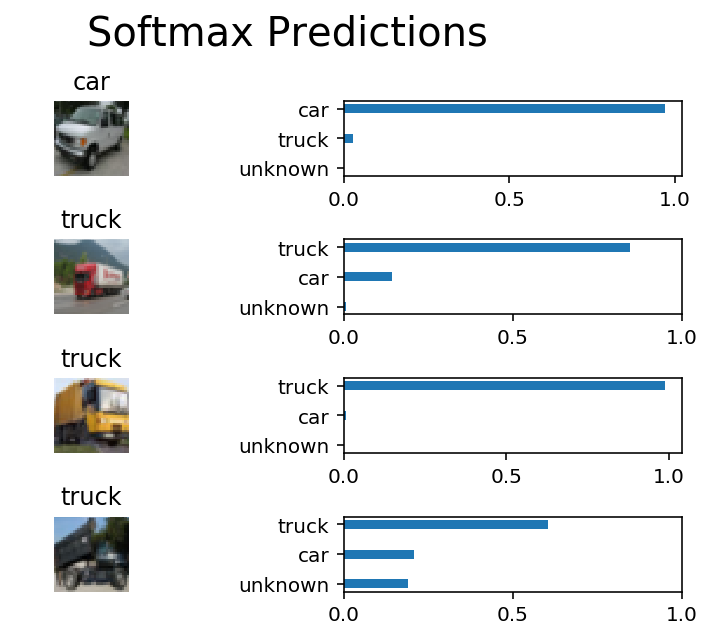

In [140]:
display((labels[:10]))
random_test()

In [121]:
def liveImagePredictio(img):
    label_names = _load_label_names()
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
    
        img = img.reshape(32, 32, 3)
        classification = sess.run(tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions), feed_dict={loaded_x: [img], loaded_keep_prob: 1.0})
        plt.imshow(img, cmap=plt.cm.binary)
        plt.show()
        print ('Top {} prediction :' .format(top_n_predictions))
        print ('{}% ' .format(classification[0]*100) )
        print ('predicted value {}' .format(classification[1]))
        pred = classification[1][0]
        
        display(label_names[pred[0]])

array([ 0.,  0.,  1.])

INFO:tensorflow:Restoring parameters from ./vehicle_classification


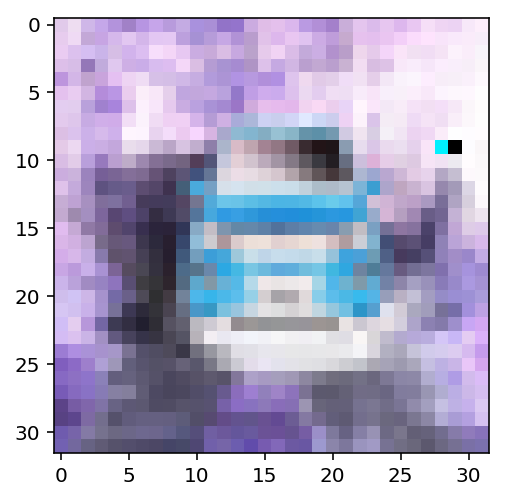

Top 3 prediction :
[[  1.00000000e+02   1.93838339e-27   0.00000000e+00]]% 
predicted value [[1 0 2]]


'car'

In [142]:

i = 14
data = test_features[i]
display(test_labels[i])
image = Image.open("./LiveImage/car6.jpg")
#image = Image.open("./truck/image0023.png")
image.load()
image = image.resize((32,32), Image.ANTIALIAS)
data = np.array(image, dtype=np.float32).flatten()

#cv2.resize(feature, data, (32,32,3))

liveImagePredictio(data)